## Загрузим файл с данными и посмотрим общую информацию:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Описание данных:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга, 
- city — город,
- gender — пол, 
- age — возраст,
- equity — количество баллов собственности 
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент, 
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- churn — признак оттока.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


В датафрейме представлено 10 000 строк. Проблем с типом данных не обнаружено.
- balance — максимальный баланс на счёте - 119 113 552, при этом медиана - 827 794.
- EST_SALARY — максимальный оценочный доход клиента - 1 395 064, при это медиана - 147 866.

## Подготовка данных

In [5]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [6]:
# проверим датасет на дубликаты
data.duplicated().sum()

0

In [7]:
# посмотрим есть ли дубликаты в userid
data['userid'].duplicated().sum()

73

Обнаружено 73 дубликата, проверим дублируются ли в этих строках так же названия населенных пунктов и возраст клиентов

In [8]:
data[data.duplicated(['userid', 'city', 'age'])].count()

userid           0
score            0
city             0
gender           0
age              0
equity           0
balance          0
products         0
credit_card      0
last_activity    0
est_salary       0
churn            0
dtype: int64

Дубликатов по трем признакам не обнаружено, выведем строки с дубликатами в userid на экран, чтобы удостовериться, что это разные клиенты

In [9]:
data_dup = data.loc[data.duplicated(['userid'])].sort_values(by = 'userid', ascending = False)
data_dup

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0
9104,222480,776.0,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0


In [10]:
data_dup_in = data[data['userid'].isin(data_dup['userid'])].sort_values(by = 'userid', ascending = False)
pd.set_option('display.max_rows', None)
data_dup_in

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
6412,226550,939.0,Ярославль,М,34.0,0,NaN,1,1,1,145913.73,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0
9104,222480,776.0,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0
6446,222480,776.0,Ярославль,Ж,38.0,5,823145.83,2,1,1,55777.44,0


Из таблицы видно, что уникальными идентификаторы являются только в рамках одного города. Разные клиенты в разных городах могут иметь один и тот же идентификатор.

In [11]:
# посмотрим количество пропусков
data.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Обнаружено 26 пропусков в возрасте и 2 295 пропусков в балансе на счету.

In [12]:
# посмотрим на строки с пропусками в возрасте
data[data['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [13]:
data['age'].isna().sum()/data['userid'].count()

0.0026

У многих из этих клиентов так же не понятен баланс на счету и всего один из них попадает в отток. Доля таких клиентов в датасете менее 0,3%, их удаление не повлияет на результат исследования. Удалим эти строки.

In [14]:
data = data.dropna(subset=['age'], how='all')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


Изучим строки с неизвестным балансом:

In [15]:
data['balance'].isna().sum()/data['userid'].count()

0.22849408462001203

In [16]:
# сгруппируем клиентов по продуктам
category = data[data['balance'].isna()].groupby('products')[['products']].count()
category.columns = ['total_count']
category = category.reset_index().sort_values(by='total_count', ascending=False)
category

,products,total_count
1,1,1934
2,2,315
3,3,29
0,0,1


In [17]:
# сгруппируем клиентов по наличию кредитной карты
category = data[data['balance'].isna()].groupby('credit_card')[['credit_card']].count()
category.columns = ['total_count']
category = category.reset_index()
category

,credit_card,total_count
0,0,421
1,1,1858


In [18]:
category['total_count'][0]/category['total_count'].sum()

0.18473014480035102

In [19]:
# сгруппируем клиентов по оттоку
category = data[data['balance'].isna()].groupby('churn')[['churn']].count()
category.columns = ['total_count']
category = category.reset_index()
category

,churn,total_count
0,0,2266
1,1,13


In [20]:
category['total_count'][1]/category['total_count'].sum()

0.005704256252742431

In [21]:
# сгруппируем клиентов по баллам собственности
category = data[data['balance'].isna()].groupby('equity')[['equity']].count()
category.columns = ['total_count']
category = category.reset_index()
category

,equity,total_count
0,0,2164
1,1,114
2,3,1


In [22]:
category['total_count'][0]/category['total_count'].sum()

0.9495392716103555

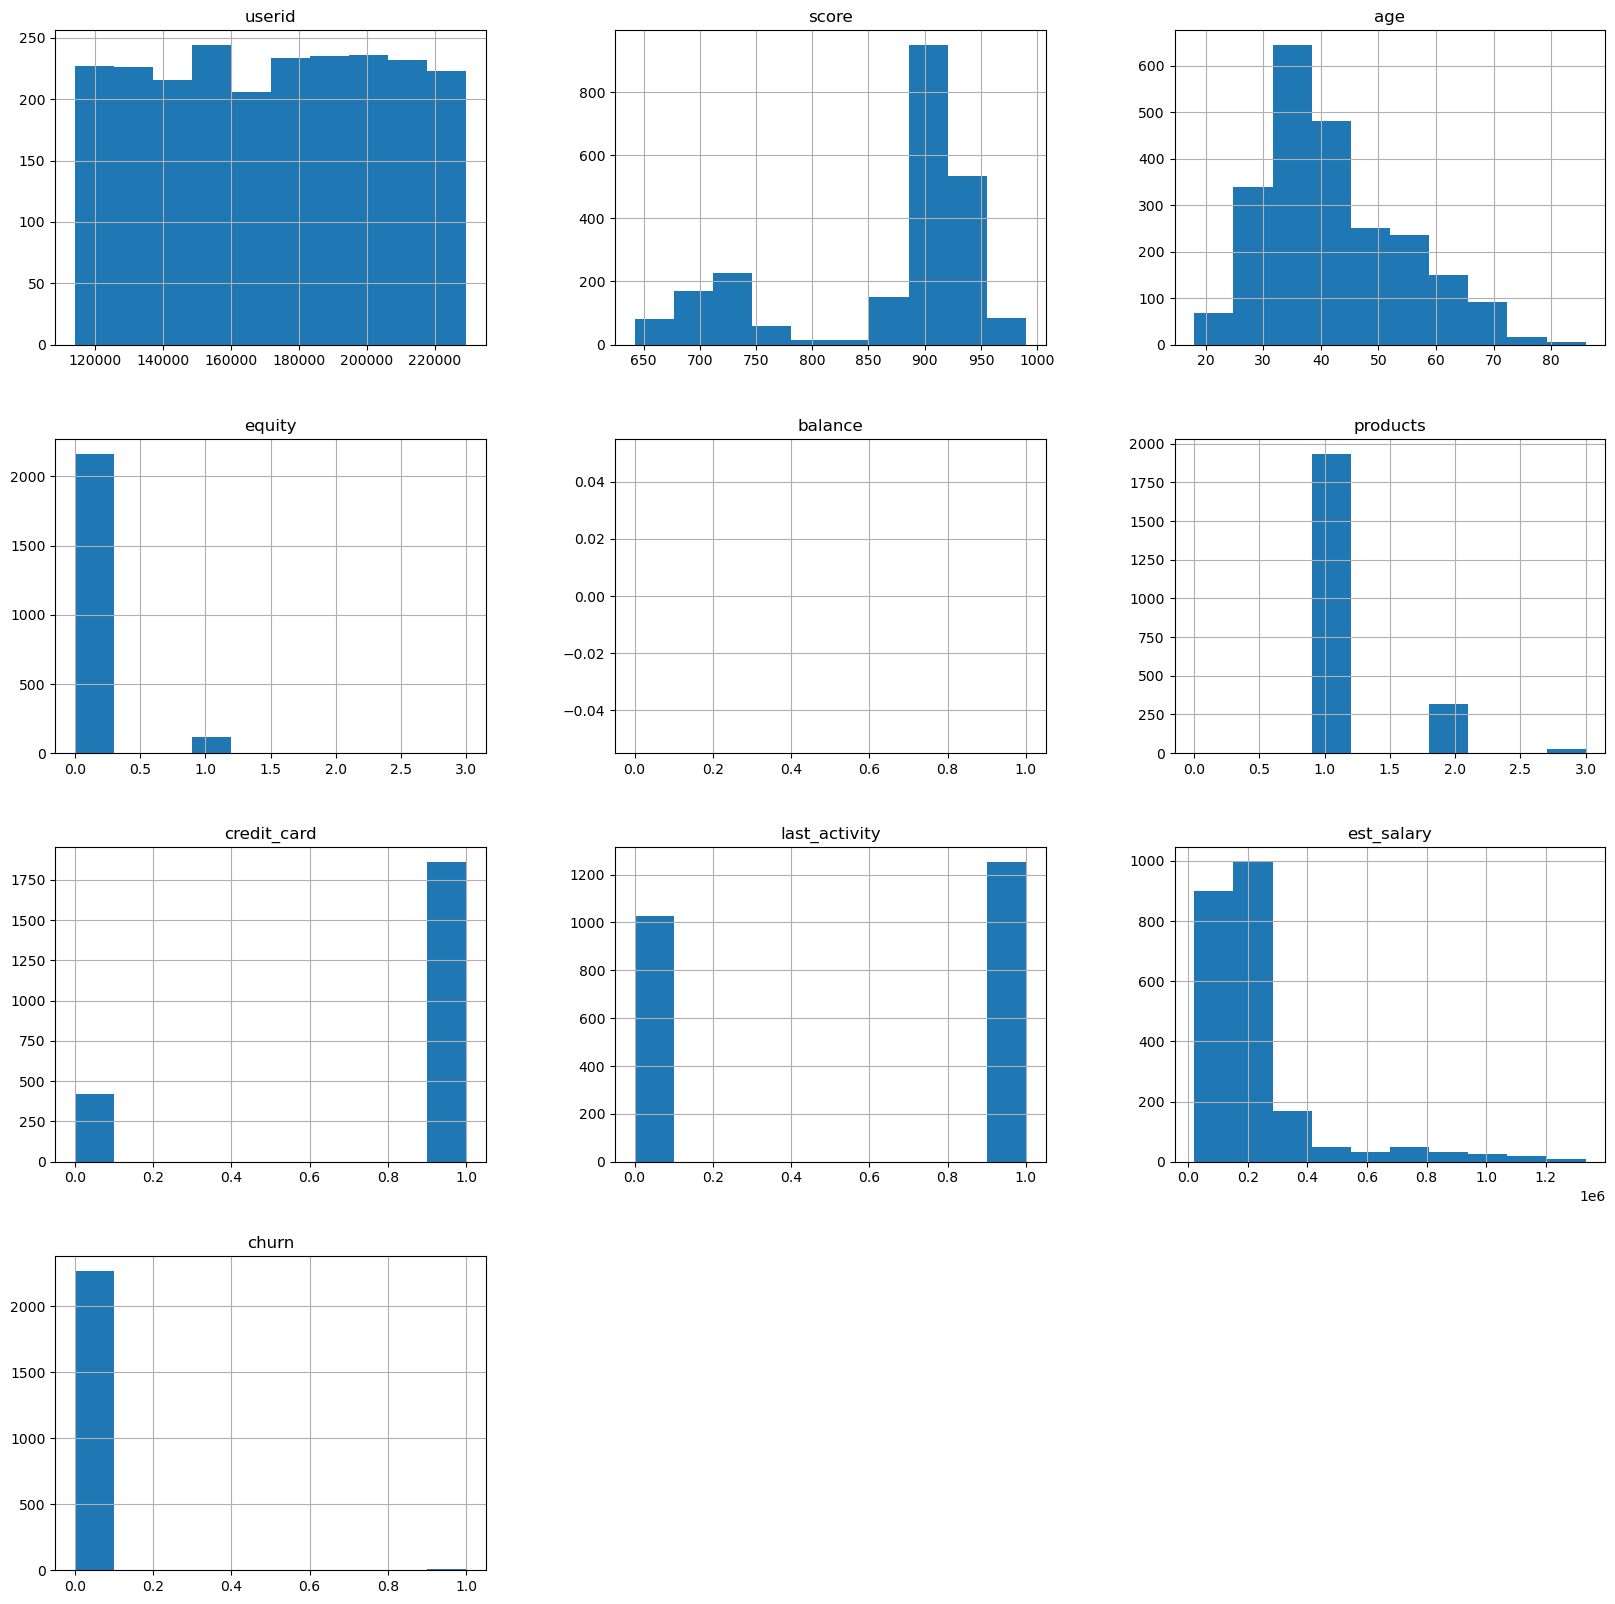

In [23]:
# построим гистограммы для клиентов с неизвестным балансом
data[data['balance'].isna()].hist(figsize=(20, 20))
plt.show()

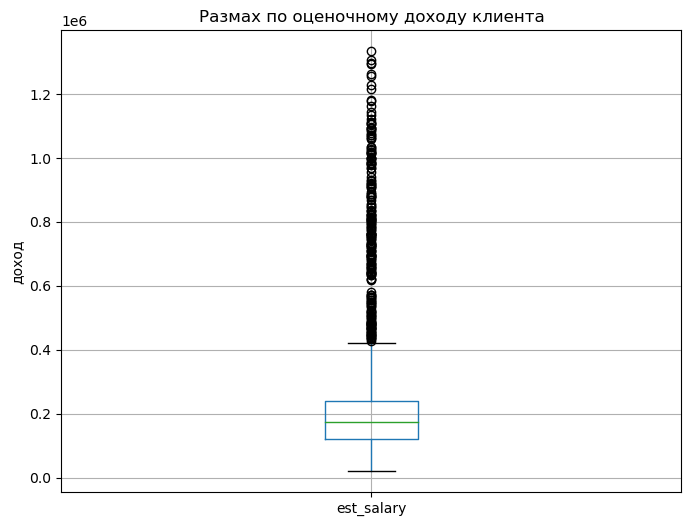

In [24]:
# построим диаграмму размаха
data[data['balance'].isna()].boxplot(column='est_salary', figsize=(8, 6))
plt.title('Размах по оценочному доходу клиента')
plt.ylabel('доход')
plt.show()

In [25]:
# описательная статистика столбца est_salary
data['est_salary'].describe().T

count    9.974000e+03
mean     1.477868e+05
std      1.392855e+05
min      2.546300e+03
25%      7.525166e+04
50%      1.196268e+05
75%      1.744998e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [26]:
data2 = data[data['balance'].isna()]
data2[data2['est_salary'] > 400000]['userid'].count()/data['balance'].isna().sum()

0.09477841158402808

Явно объединить таких клиентов в единую группу нельзя. 

18% из них не имеют кредитной карты, а значит мы не можем предположить, что это закредитованные клиенты с отрицательным балансом. В датасете есть сроки с заполненным нулевым балансом, значит этих клиентов отнести к нулевому балансу тоже нельзя.

Менее 1% от этих клиентов попадает в отток. 95% получили нулевые балы собственности. При этом на гистограмме видно, что подавляющее большинство этих клиентов имеют высокие баллы кредитного скорринга. Больше половины в возрасте от 25 до 45 лет со средним доходом в 147 000, при этом минимальный доход 2 546, стандартное отклонение близко к среднему значению и мы видим, что около 9% клиентов попадает в выбросы с доходом от 400 000.

Строки с неизвестным балансом занимают около 23% датафрейма, удалить или заполнить их какими-либо значениями не представляется возможным, так как это может сильно исказить результат всего исследования.

In [27]:
# проверим уникальность и корректность названий населенных пунктов
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Названия уникальны, правок не требуется.

Добавим столбцы для каждого населенного пункта с признаком 0/1 и преобразуем столбец с полом к 0/1 для проведения корреляционного анализа.

In [28]:
data_copy = data.copy()
data = pd.get_dummies(data, dummy_na=True, columns=['gender', 'city'])
data['city'] = data_copy['city'] 
data['gender'] = data_copy['gender']

In [29]:
data.head(10)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,gender_nan,city_Ростов,city_Рыбинск,city_Ярославль,city_nan,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,0,1,0,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,0,1,0,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,0,1,0,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,0,1,0,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,0,1,0,Ярославль,М
5,202305,856.0,56.0,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1,0,0,Рыбинск,М
6,177259,807.0,39.0,3,405042.44,3,0,1,103838.32,0,1,0,0,0,0,1,0,Ярославль,Ж
7,218868,825.0,38.0,4,458145.40,2,1,1,68085.48,0,1,0,0,0,0,1,0,Ярославль,Ж
8,211686,923.0,54.0,5,1206337.87,2,1,0,155371.79,0,0,1,0,0,0,1,0,Ярославль,М
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,1,0,0,0,0,1,0,Ярославль,Ж


Переименуем и удалим ненужные столбцы:

In [30]:
data.rename(columns = {'gender_Ж':'gender_g', 'gender_М':'gender_m', 'city_Ростов': 'city_ro', \
                     'city_Рыбинск': 'city_ryb', 'city_Ярославль': 'city_yar'}, inplace = True )
data = data.drop(columns=['gender_nan', 'city_nan'])

In [31]:
data.head(10)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_g,gender_m,city_ro,city_ryb,city_yar,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,Ярославль,М
5,202305,856.0,56.0,4,863687.24,3,1,0,156619.80,0,0,1,0,1,0,Рыбинск,М
6,177259,807.0,39.0,3,405042.44,3,0,1,103838.32,0,1,0,0,0,1,Ярославль,Ж
7,218868,825.0,38.0,4,458145.40,2,1,1,68085.48,0,1,0,0,0,1,Ярославль,Ж
8,211686,923.0,54.0,5,1206337.87,2,1,0,155371.79,0,0,1,0,0,1,Ярославль,М
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,1,0,0,0,1,Ярославль,Ж


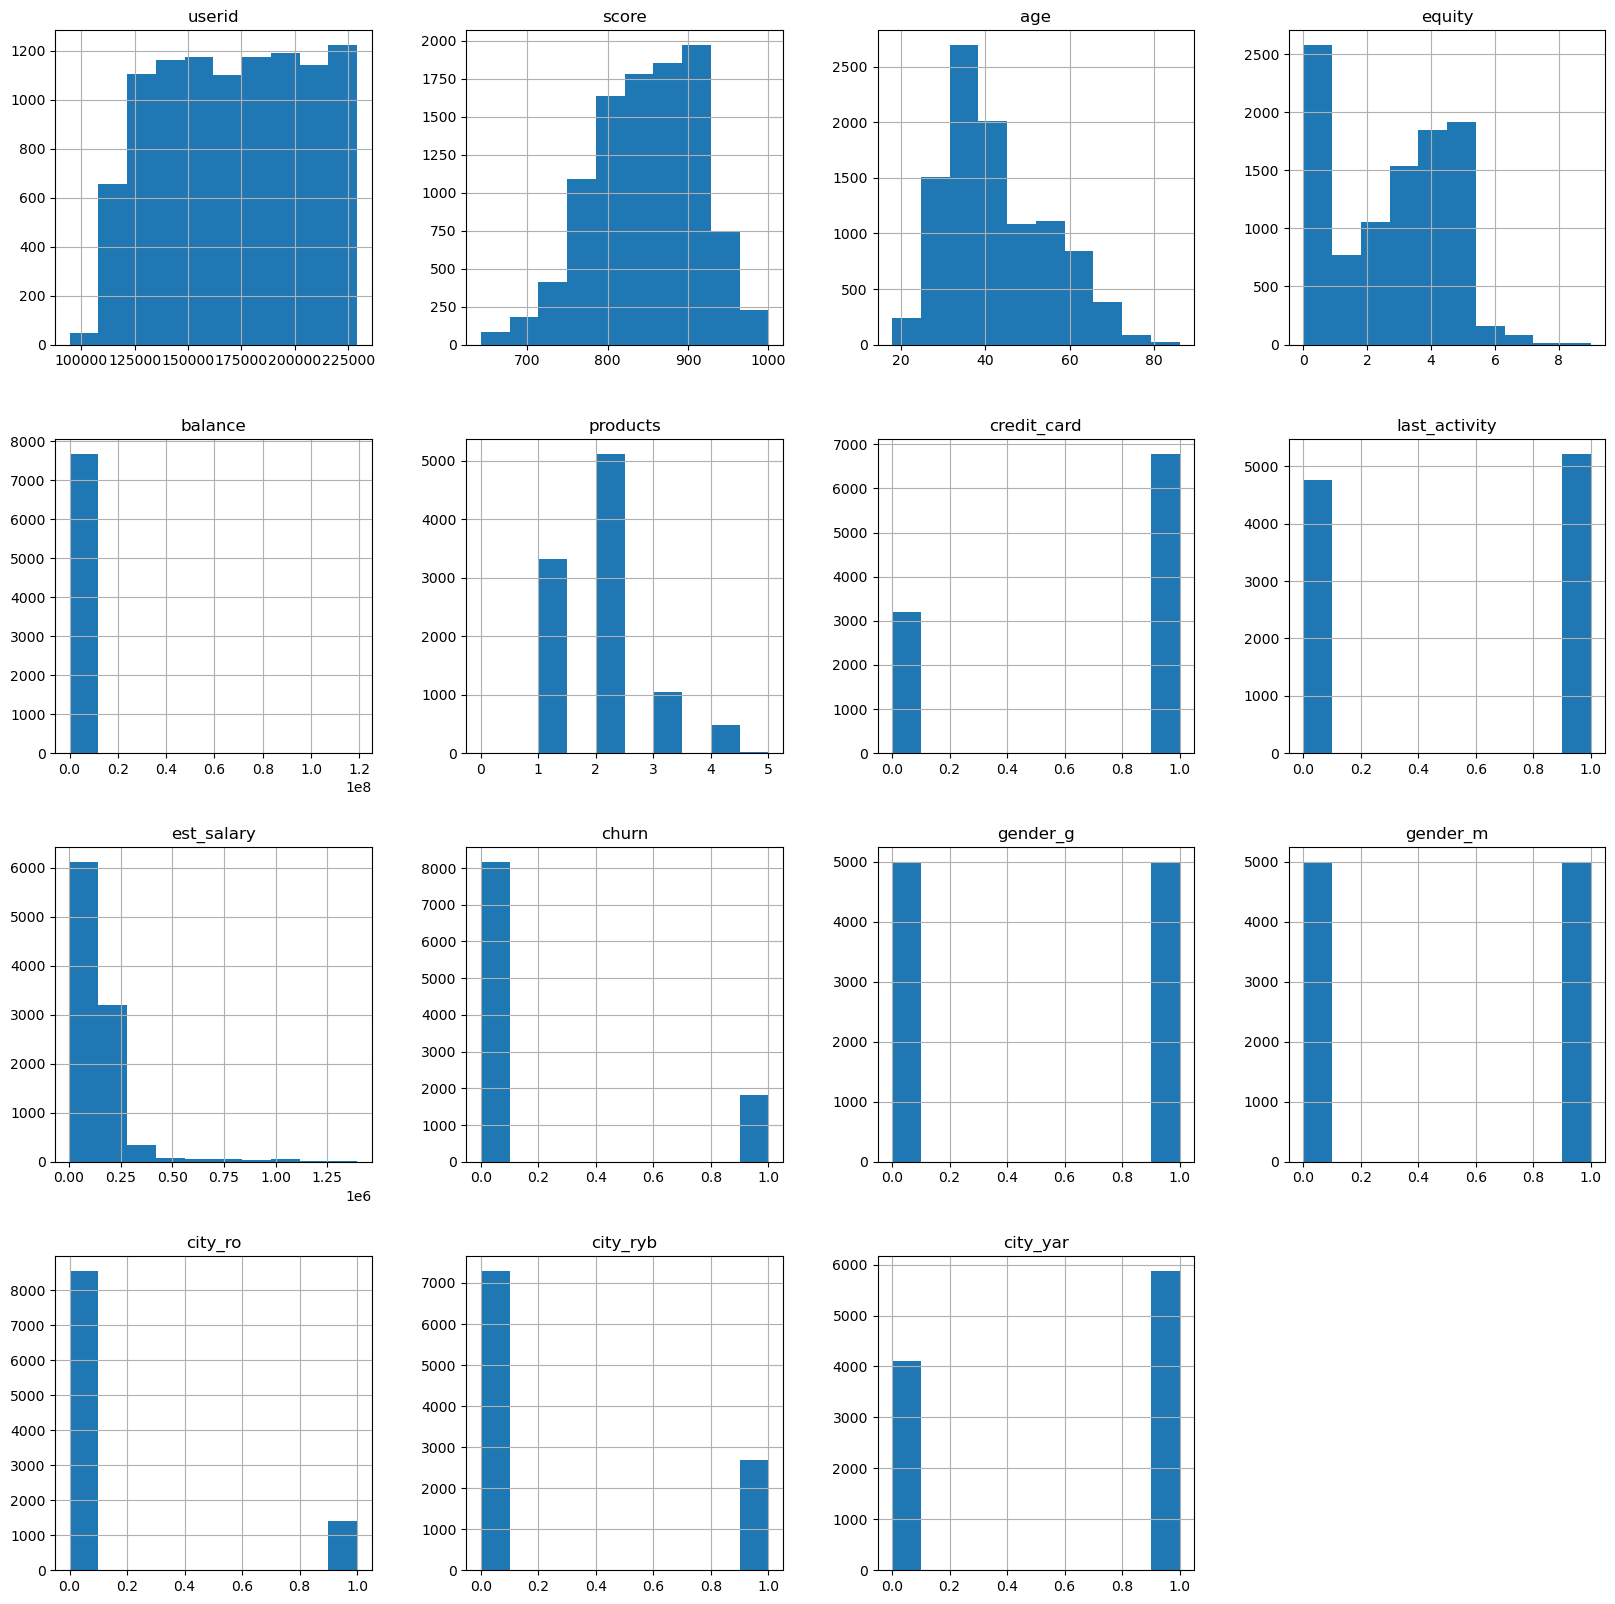

In [32]:
# построим гистограммы для всего датасета
data.hist(figsize=(20, 20))
plt.show()

Большинство клиентов банка в возрасте от 25 до 45 лет, пользуются 1 или 2 продуктами, имеют кредитную карту, со средним доходом до 250 000. По гендорному призноку клиенты разделены практически пополам. Большинство клиентов банка из Ярославля.

## Исследовательский анализ данных

### Матрица корреляций Спирмена
Построим матрицу и тепловую карту по ней

In [33]:
# удаляем столбцы с типом object для построения матрицы Спирмена
data_one = data.copy()
data_one.drop(['city', 'gender'], axis= 1, inplace= True)
data_corr = data_one.corr(method="spearman").round(2)
data_corr

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_g,gender_m,city_ro,city_ryb,city_yar
userid,1.00,0.01,0.02,0.01,0.03,-0.00,0.00,-0.03,-0.00,-0.01,-0.03,0.03,-0.03,0.01,0.01
score,0.01,1.00,-0.02,0.02,0.42,-0.09,-0.08,-0.03,0.25,0.10,-0.02,0.02,-0.05,-0.00,0.03
age,0.02,-0.02,1.00,0.02,0.22,0.03,-0.12,-0.02,0.01,-0.05,0.19,-0.19,0.05,0.03,-0.06
equity,0.01,0.02,0.02,1.00,0.55,0.46,-0.17,-0.00,-0.18,0.27,0.02,-0.02,0.03,-0.00,-0.02
balance,0.03,0.42,0.22,0.55,1.00,0.20,-0.17,0.02,0.34,0.20,-0.02,0.02,-0.04,-0.03,0.05
products,-0.00,-0.09,0.03,0.46,0.20,1.00,-0.29,0.01,-0.17,0.27,0.04,-0.04,-0.00,-0.03,0.03
credit_card,0.00,-0.08,-0.12,-0.17,-0.17,-0.29,1.00,-0.03,0.02,-0.13,-0.13,0.13,-0.10,-0.05,0.11
last_activity,-0.03,-0.03,-0.02,-0.00,0.02,0.01,-0.03,1.00,-0.01,0.17,0.01,-0.01,0.01,0.05,-0.05
est_salary,-0.00,0.25,0.01,-0.18,0.34,-0.17,0.02,-0.01,1.00,0.04,-0.12,0.12,-0.12,-0.05,0.13
churn,-0.01,0.10,-0.05,0.27,0.20,0.27,-0.13,0.17,0.04,1.00,-0.14,0.14,0.01,-0.03,0.02


<Axes: >

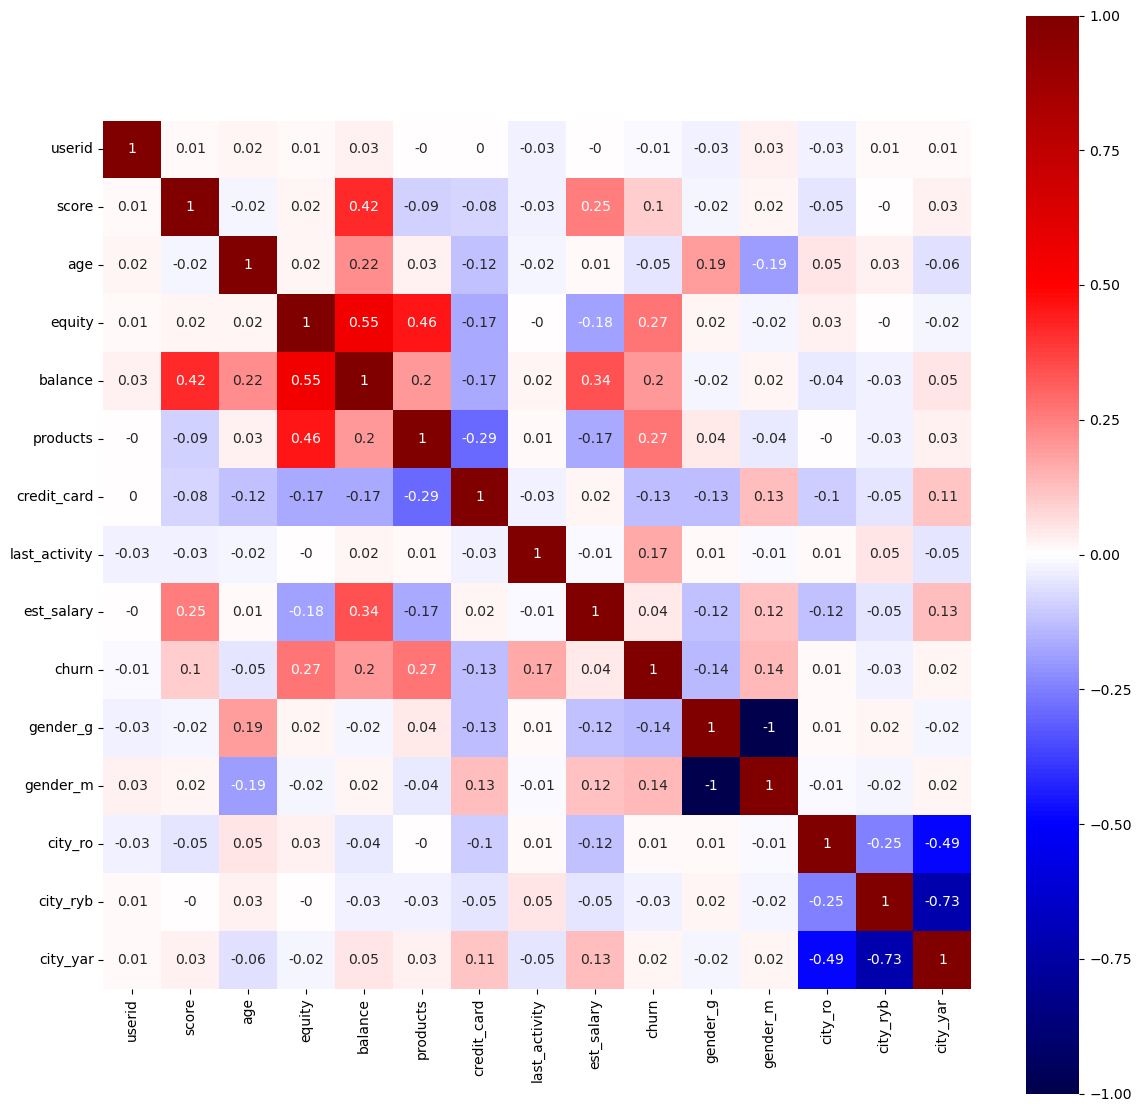

In [34]:
plt.figure(figsize=(14, 14))
sns.heatmap(data_corr, annot=True, square=True, cmap= 'seismic')

Показатели слабо коррелируют между собой. Максимальная корреляция в датасете между балансом и количеством баллов собственности - 0.55. Построим для них отдельный график:

In [35]:
data['balance'].describe().T

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

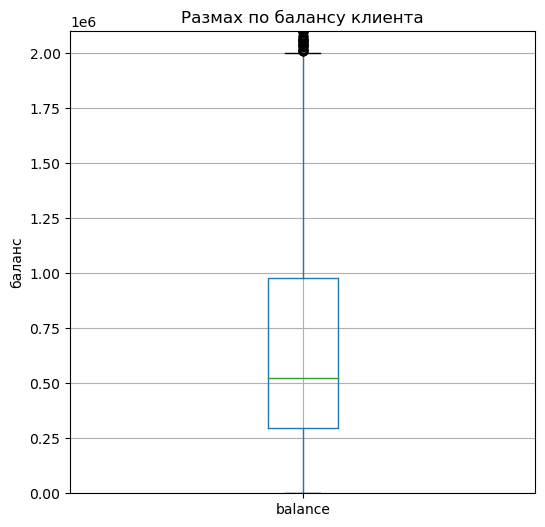

In [36]:
# построим диаграмму размаха
data.boxplot(column='balance', figsize=(6, 6))
plt.title('Размах по балансу клиента')
plt.ylabel('баланс')
plt.ylim(0, 2100000)
plt.show()

In [37]:
data[data['balance']>2000000]['userid'].count()

427

In [38]:
data[data['balance']>2000000]['userid'].count()/data['userid'].count()

0.042811309404451575

Баланс клиента больше 2 млн является выбросом. В датасете таких клиентов 427, то есть около 4%.

(0.0, 2000000.0)

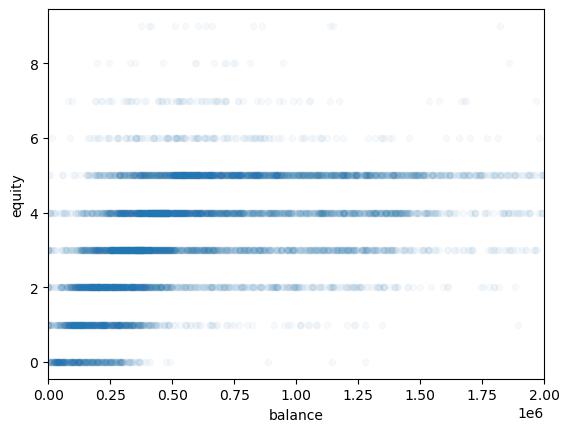

In [39]:
data.plot(x='balance', y='equity', kind='scatter', alpha=0.03) 
plt.xlim(0,2000000)

Некоторая зависимость прослеживается, но корреляция не настолько явная, чтобы учесть ее в исследовании.

### Распределение по признаку
Построим графики распределения по разным признакам с выделением оттока

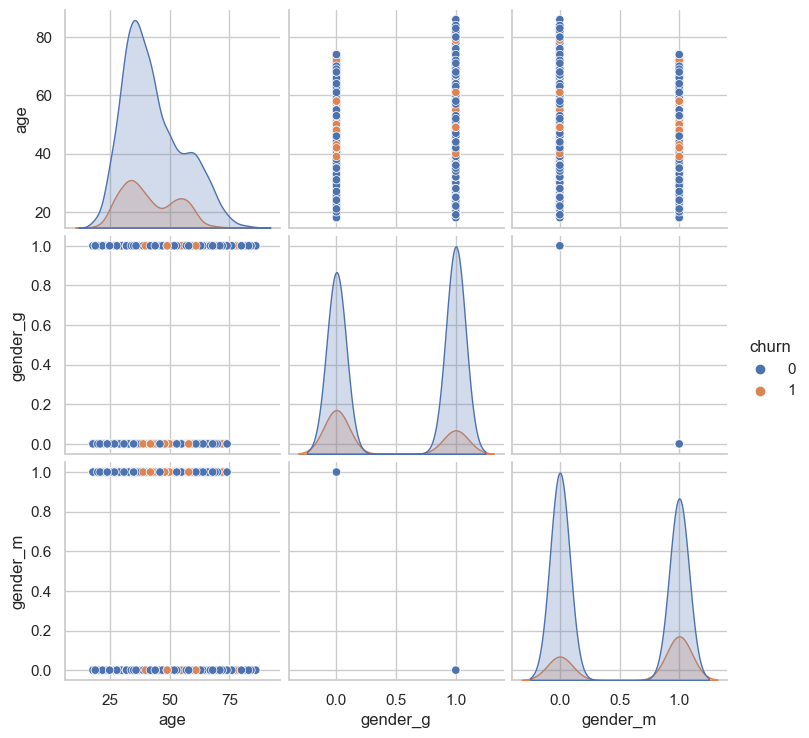

In [40]:
sns.set(style="whitegrid")
sns.pairplot(data[['age', 'gender_g', 'gender_m', 'churn']], hue='churn') 

По графикам видно, что в отток попадает больше мужчин. Посмотрим подробнее на график по возрасту:

Text(0.5, 1.0, 'Распределение клиентов по возрасту')

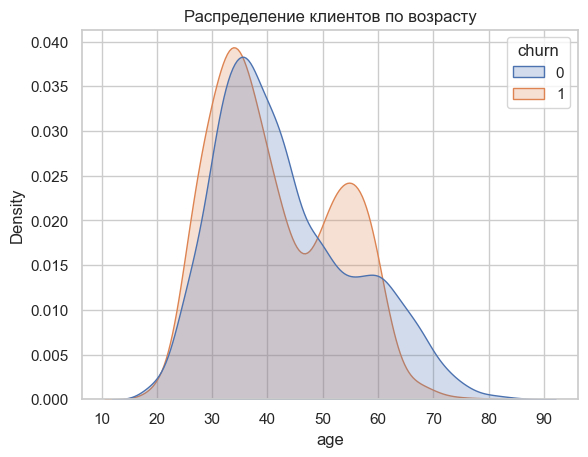

In [41]:
sns.kdeplot(
  data=data,
  x="age",
  hue="churn",
  fill=True, 
  common_norm=False,
)
plt.title('Распределение клиентов по возрасту')

Вероятность попасть в отток выше у клиентов в возрасте от 25 до 35 и от 50 до 61.
Вероятность не попасть в отток выше у клиентов от 35 до 49 и старше 61.

С большей вероятностью в отток попадают мужчины.

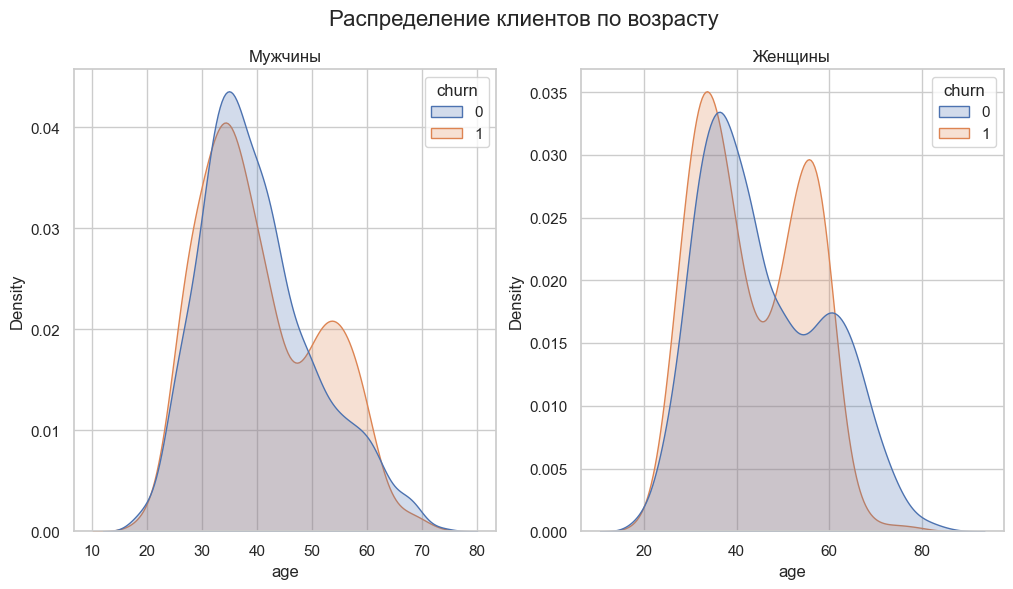

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.kdeplot(
  data=data[data['gender_m']==1],
  x="age",
  hue="churn",
  fill=True, 
  common_norm=False,
  ax=axes[0]

)
fig.suptitle('Распределение клиентов по возрасту', fontsize=16)
axes[0].set_title('Мужчины')

sns.kdeplot(
  data=data[data['gender_g']==1],
  x="age",
  hue="churn",
  fill=True, 
  common_norm=False,
  ax=axes[1]

)
axes[1].set_title('Женщины')


plt.show()

Мужчины с большей вероятностью попадают в отток в возрасте 25-30 и 50-61.

Женщины чаще попадают в отток в возрасте 25-35, 49-61.

Посмотрим на распределение следующей группы признаков

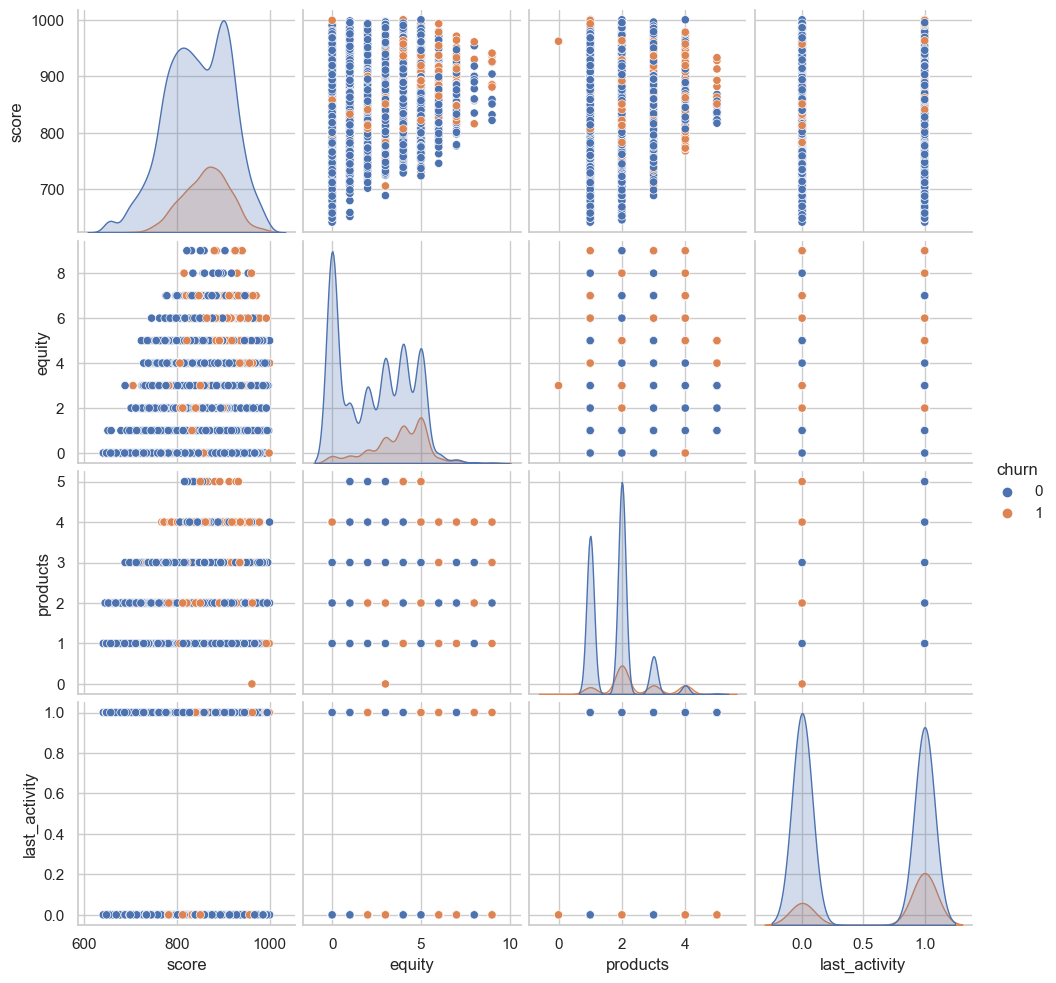

In [43]:
sns.pairplot(data[['score', 'equity', 'products', 'last_activity', 'churn']], hue='churn') 

Text(0.5, 0.98, 'Распределение клиентов по баллам кредитного скоринга')

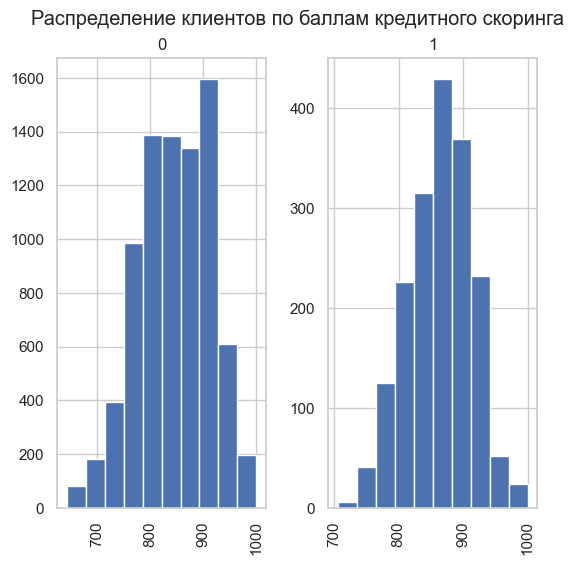

In [44]:
data.hist(column="score", by="churn", figsize=(6, 6))


plt.suptitle('Распределение клиентов по баллам кредитного скоринга')

Text(0.5, 0.98, 'Распределение клиентов по количеству баллов собственности')

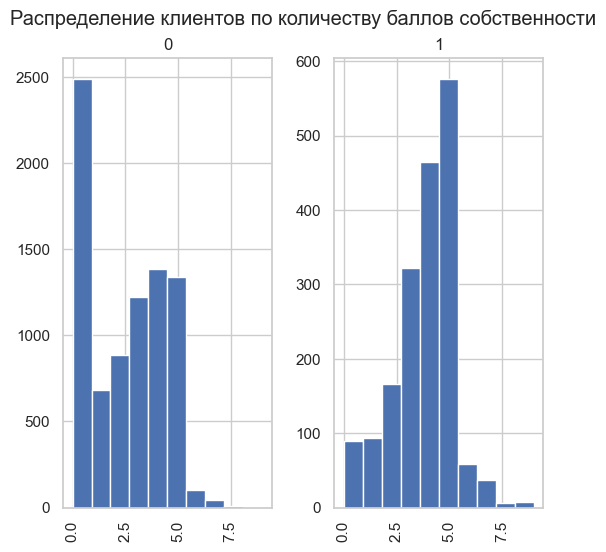

In [45]:
data.hist(column="equity", by="churn", figsize=(6, 6))

plt.suptitle('Распределение клиентов по количеству баллов собственности')

In [46]:
data.head(5)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_g,gender_m,city_ro,city_ryb,city_yar,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,Ярославль,М


In [47]:
data['score'].min()

642.0

Более склонны к оттоку клиенты с несколькими продуктами (больше одного), с количеством баллов собственности больше 2, с баллами кредитного скоринга - 820 до 910.

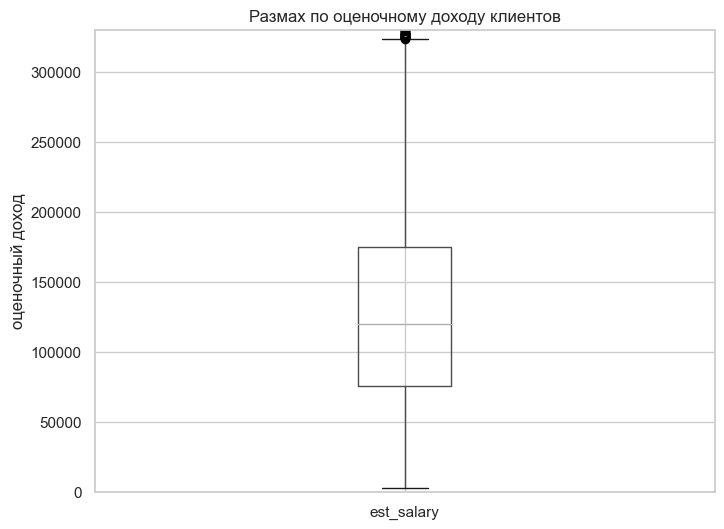

In [48]:
# Строим диаграмму размаха по оценочному доходу клиентов
data.boxplot(column='est_salary', figsize=(8, 6))
plt.title('Размах по оценочному доходу клиентов')
plt.ylabel('оценочный доход')
plt.ylim(0, 330000)
plt.show()

In [49]:
data[data['est_salary']>330000]['userid'].count()

457

In [50]:
(data[data['est_salary']>330000]['userid'].count()/data['userid'].count()).round(3)

0.046

Оценочный доход больше 330 тыс является выбросом. В датасете таких клиентов 457, то есть около 4,6%.

Построим распределение для еще одной группы признаков без учета выбрасов по балансу и оценочному доходу:

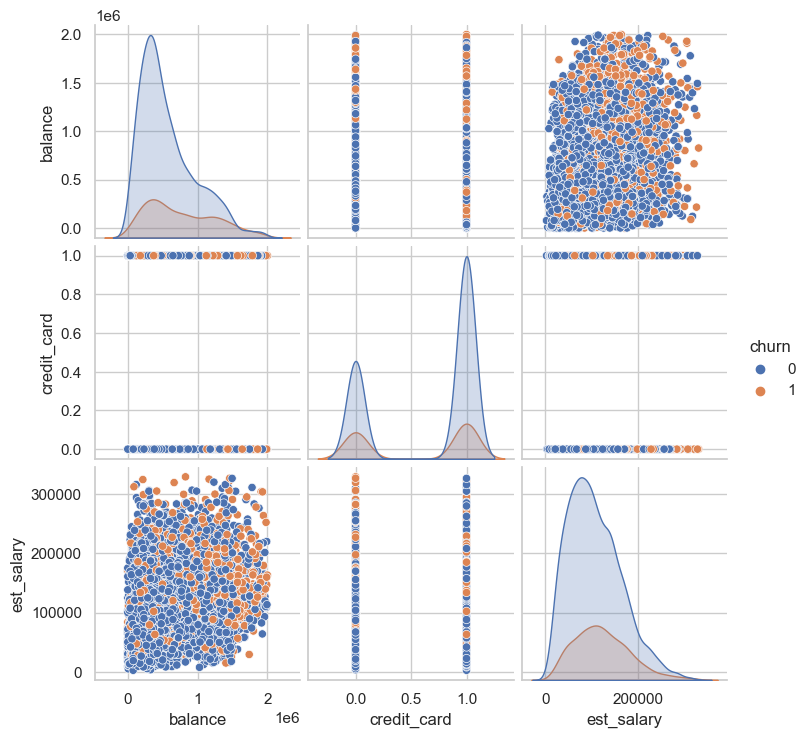

In [51]:
sns.pairplot(data[(data['balance'] < 2000000) & (data['est_salary'] < 330000)][['balance', 'credit_card', 'est_salary', 'churn']], hue='churn')

Text(0.5, 1.0, 'Распределение клиентов по баллансу')

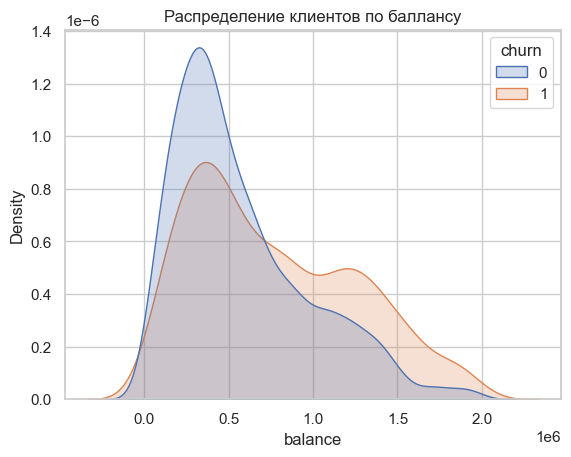

In [52]:
sns.kdeplot(
  data=data[data['balance']<2000000],
  x="balance",
  hue="churn",
  fill=True, common_norm=False,

)
plt.title('Распределение клиентов по баллансу')

(array([-100000.,  -50000.,       0.,   50000.,  100000.,  150000.,
         200000.,  250000.,  300000.,  350000.,  400000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000')])

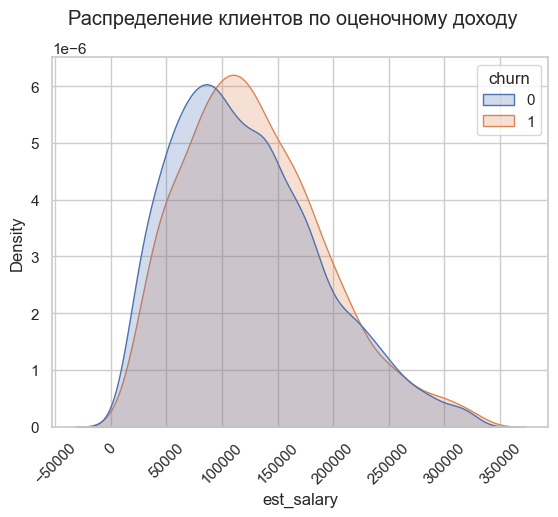

In [53]:
sns.kdeplot(
  data=data[data['est_salary']<330000],
  x="est_salary",
  hue="churn",
  fill=True, common_norm=False,

)
plt.suptitle('Распределение клиентов по оценочному доходу')

plt.xticks(rotation=45)

К оттоку больше склонны клиенты с балансов выше 0,8 млн, с оценочным доходом от 100 тыс до 220 тыс.

### Отток
Посмотрим отдельно на клиентов, попавших в отток.

In [54]:
pie_data = data.groupby('churn')[['churn']].count()
# переименуем столбец
pie_data.columns = ['total_count']

pie_data = pie_data.reset_index().sort_values(by='total_count', ascending=False)
pie_data

,churn,total_count
0,0,8155
1,1,1819


Text(0.5, 1.0, 'Деление по оттоку')

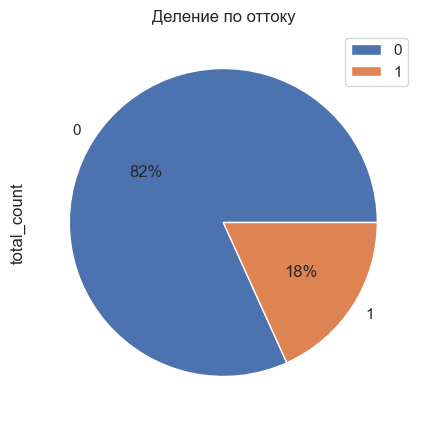

In [55]:
pie_data.plot(kind='pie', y='total_count', autopct='%1.0f%%', figsize=(5, 5))
plt.title('Деление по оттоку')

В отток попало 18%, а именно 1 819 клиентов банка. Выделим их в отдельный датасет.

In [56]:
data_churn = data.copy()
data_churn = data_churn.loc[data_churn['churn']==1]
data_churn.drop(['city', 'gender'], axis= 1, inplace= True)
data_churn.head(5)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_g,gender_m,city_ro,city_ryb,city_yar
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,1
12,132970,845.0,31.0,3,591928.52,2,1,1,112697.16,1,1,0,0,0,1
40,129705,811.0,34.0,2,129799.35,1,0,0,96242.71,1,0,1,0,1,0


Построим матрицу Спирмена по оттоку и тепловую карту по ней

In [57]:
data_corr_churn = data_churn.corr(method="spearman").round(2)
data_corr_churn

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_g,gender_m,city_ro,city_ryb,city_yar
userid,1.00,-0.02,0.08,0.06,0.09,0.06,0.06,-0.04,0.05,NaN,-0.18,0.18,-0.07,-0.05,0.09
score,-0.02,1.00,-0.16,0.39,0.55,0.12,-0.22,0.15,0.37,NaN,0.02,-0.02,-0.08,-0.01,0.06
age,0.08,-0.16,1.00,-0.05,0.17,0.04,-0.05,-0.15,0.04,NaN,0.12,-0.12,0.05,0.04,-0.08
equity,0.06,0.39,-0.05,1.00,0.42,0.16,-0.14,0.11,0.13,NaN,-0.05,0.05,-0.04,-0.05,0.07
balance,0.09,0.55,0.17,0.42,1.00,0.28,-0.21,0.07,0.49,NaN,-0.03,0.03,-0.06,-0.07,0.11
products,0.06,0.12,0.04,0.16,0.28,1.00,-0.05,-0.04,0.12,NaN,0.05,-0.05,-0.09,-0.09,0.14
credit_card,0.06,-0.22,-0.05,-0.14,-0.21,-0.05,1.00,-0.09,-0.08,NaN,-0.17,0.17,-0.04,-0.05,0.07
last_activity,-0.04,0.15,-0.15,0.11,0.07,-0.04,-0.09,1.00,0.06,NaN,0.15,-0.15,-0.04,0.05,-0.02
est_salary,0.05,0.37,0.04,0.13,0.49,0.12,-0.08,0.06,1.00,NaN,-0.04,0.04,-0.09,-0.05,0.11
churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

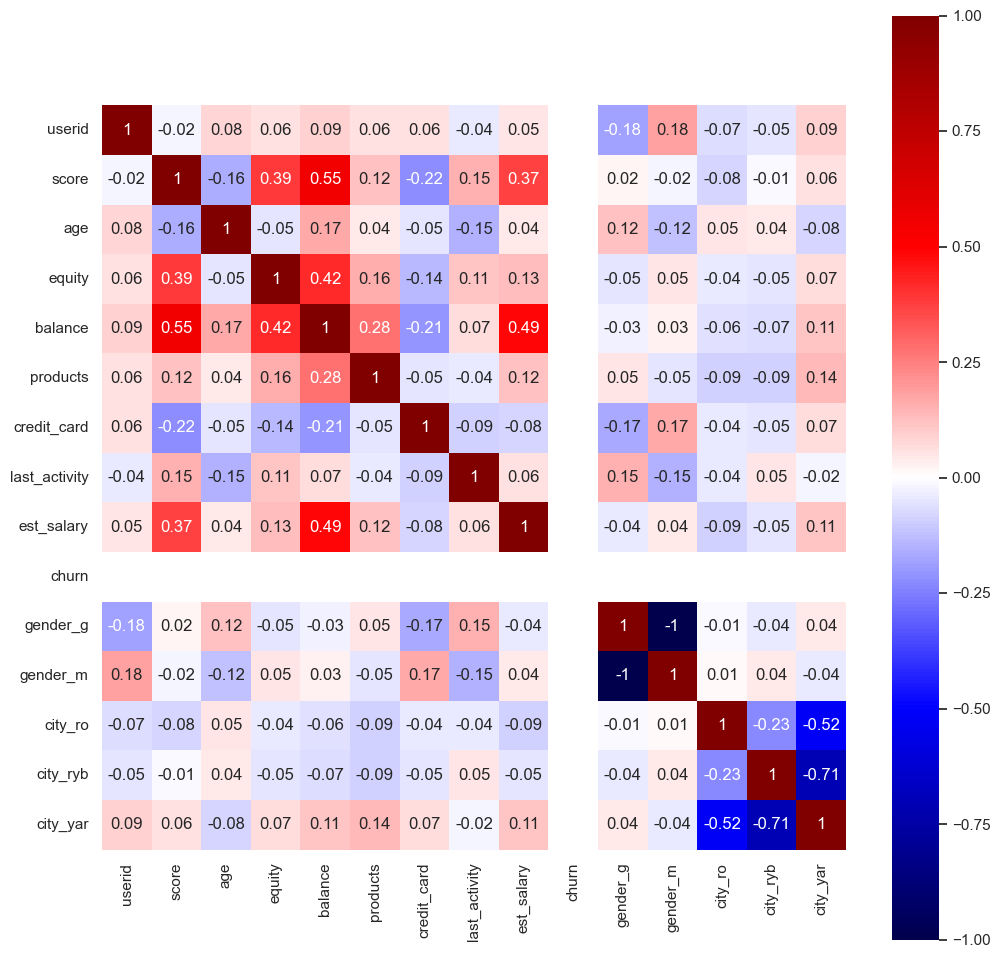

In [58]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(12, 12))
sns.heatmap(data_corr_churn, annot=True, square=True, cmap= 'seismic')

Показатели слабо коррелируют между собой. Максимальная корреляция в датасете между балансом и баллами кредитного скорринга - 0.55. Построим для них отдельный график:

(0.0, 2000000.0)

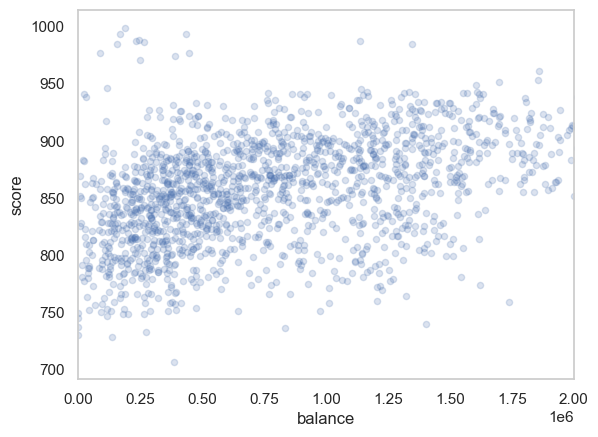

In [59]:
data_churn.plot(x='balance', y='score', kind='scatter', alpha=0.2) 
plt.xlim(0,2000000)

Видно, что прямой зависимости между показателями выделить нельзя.

Сгруппируем данные по оттоку и посмотрим на средние значения по показателям:

In [60]:
data_churn_group = data.groupby('churn')[['score', 'age', 'equity', 'balance', 'products',\
                                          'credit_card', 'est_salary']].mean().round(2)

data_churn_group = data_churn_group.reset_index()
data_churn_group

,churn,score,age,equity,balance,products,credit_card,est_salary
0,0,845.40,43.02,2.38,733031.63,1.76,0.71,147674.64
1,1,863.42,41.45,3.76,1134458.21,2.38,0.55,148289.70


Из таблицы видно, что у оттока значительно выше показатели по средним баллам собственности, балансу, количеству продуктов.

Построим сводную таблицу в разрезе оттока и количества продуктов:

In [61]:
data_pivot_table = data_one.pivot_table(index=['churn', 'products'])
data_pivot_table

age       balance   city_ro  city_ryb  city_yar  \
churn products                                                          
0     1         42.249028  6.013344e+05  0.127915  0.259391  0.612694   
      2         43.227723  7.281140e+05  0.157691  0.309104  0.533205   
      3         46.337382  9.384193e+05  0.091768  0.175439  0.732794   
      4         38.114943  9.120333e+05  0.178161  0.201149  0.620690   
      5         36.000000  1.742656e+05  0.363636  0.000000  0.636364   
1     0         79.000000           NaN  0.000000  1.000000  0.000000   
      1         41.502128  6.605154e+05  0.208511  0.238298  0.553191   
      2         40.826176  1.141337e+06  0.155419  0.286299  0.558282   
      3         44.161616  1.128787e+06  0.090909  0.117845  0.791246   
      4         40.750000  1.474177e+06  0.123333  0.213333  0.663333   
      5         37.125000  1.211478e+06  0.000000  0.125000  0.875000   

                credit_card    equity     est_salary  gender_g  gender_m  \
churn products                                                             
0     1            0.860751  1.193977  183782.887494  0.473769  0.526231   
      2            0.664574  3.009418  126870.084624  0.563632  0.436368   
      3            0.368421  3.365722  124087.739838  0.627530  0.372470   
      4            0.500000  4.126437  105456.282241  0.454023  0.545977   
      5            1.000000  3.090909   99789.689091  0.545455  0.454545   
1     0            0.000000  3.000000   25063.960000  1.000000  0.000000   
      1            0.902128  3.114894  138849.512298  0.272340  0.727660   
      2            0.461145  3.748466  145348.178292  0.349693  0.650307   
      3            0.323232  3.898990  140196.894545  0.424242  0.575758   
      4            0.786667  4.166667  173921.901833  0.333333  0.666667   
      5            1.000000  4.500000  139837.798750  0.375000  0.625000   

                last_activity       score         userid  
churn products                                            
0     1              0.517487  854.608161  172129.981541  
      2              0.460758  839.911374  172073.144893  
      3              0.345479  832.116059  172211.210526  
      4              0.948276  869.505747  164405.132184  
      5              1.000000  837.363636  160587.818182  
1     0              0.000000  962.000000  147837.000000  
      1              0.659574  850.182979  170231.927660  
      2              0.747444  864.235174  168944.028630  
      3              0.592593  850.023569  174803.225589  
      4              0.696667  883.350000  174619.403333  
      5              0.750000  889.375000  166353.750000

Посмотрим отдельно на строку с нулевым количеством продуктов:

In [62]:
data[data['products']==0]

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_g,gender_m,city_ro,city_ryb,city_yar,city,gender
8957,147837,962.0,79.0,3,NaN,0,0,0,25063.96,1,1,0,0,1,0,Рыбинск,Ж


Судя по данным этот клиент уже полностью ушел из банка, можно не брать его в расчет в срезе по продуктам.

In [63]:
data_pivot_table = data_one[data_one['products']!=0].pivot_table(index=['churn', 'products']).round(2)
data_pivot_table

age     balance  city_ro  city_ryb  city_yar  credit_card  \
churn products                                                                
0     1         42.25   601334.43     0.13      0.26      0.61         0.86   
      2         43.23   728113.96     0.16      0.31      0.53         0.66   
      3         46.34   938419.32     0.09      0.18      0.73         0.37   
      4         38.11   912033.29     0.18      0.20      0.62         0.50   
      5         36.00   174265.59     0.36      0.00      0.64         1.00   
1     1         41.50   660515.44     0.21      0.24      0.55         0.90   
      2         40.83  1141336.81     0.16      0.29      0.56         0.46   
      3         44.16  1128787.33     0.09      0.12      0.79         0.32   
      4         40.75  1474177.20     0.12      0.21      0.66         0.79   
      5         37.12  1211478.07     0.00      0.12      0.88         1.00   

                equity  est_salary  gender_g  gender_m  last_activity   score  \
churn products                                                                  
0     1           1.19   183782.89      0.47      0.53           0.52  854.61   
      2           3.01   126870.08      0.56      0.44           0.46  839.91   
      3           3.37   124087.74      0.63      0.37           0.35  832.12   
      4           4.13   105456.28      0.45      0.55           0.95  869.51   
      5           3.09    99789.69      0.55      0.45           1.00  837.36   
1     1           3.11   138849.51      0.27      0.73           0.66  850.18   
      2           3.75   145348.18      0.35      0.65           0.75  864.24   
      3           3.90   140196.89      0.42      0.58           0.59  850.02   
      4           4.17   173921.90      0.33      0.67           0.70  883.35   
      5           4.50   139837.80      0.38      0.62           0.75  889.38   

                   userid  
churn products             
0     1         172129.98  
      2         172073.14  
      3         172211.21  
      4         164405.13  
      5         160587.82  
1     1         170231.93  
      2         168944.03  
      3         174803.23  
      4         174619.40  
      5         166353.75

Посмотрим на данные в процентном распределении:

In [64]:
data_pivot_table_per = data_pivot_table.apply(lambda x: (x*100/sum(x)).round(2))
data_pivot_table_per

age  balance  city_ro  city_ryb  city_yar  credit_card  \
churn products                                                             
0     1         10.30     6.70     8.67     13.47      9.28        12.54   
      2         10.54     8.12    10.67     16.06      8.07         9.62   
      3         11.29    10.46     6.00      9.33     11.11         5.39   
      4          9.29    10.17    12.00     10.36      9.44         7.29   
      5          8.77     1.94    24.00      0.00      9.74        14.58   
1     1         10.11     7.36    14.00     12.44      8.37        13.12   
      2          9.95    12.72    10.67     15.03      8.52         6.71   
      3         10.76    12.58     6.00      6.22     12.02         4.66   
      4          9.93    16.43     8.00     10.88     10.05        11.52   
      5          9.05    13.51     0.00      6.22     13.39        14.58   

                equity  est_salary  gender_g  gender_m  last_activity  score  \
churn products                                                                 
0     1           3.48       13.34     10.66      9.48           7.73   9.97   
      2           8.80        9.21     12.70      7.87           6.84   9.80   
      3           9.85        9.00     14.29      6.62           5.20   9.71   
      4          12.07        7.65     10.20      9.84          14.12  10.15   
      5           9.03        7.24     12.47      8.05          14.86   9.77   
1     1           9.09       10.08      6.12     13.06           9.81   9.92   
      2          10.96       10.55      7.94     11.63          11.14  10.08   
      3          11.40       10.17      9.52     10.38           8.77   9.92   
      4          12.19       12.62      7.48     11.99          10.40  10.31   
      5          13.15       10.15      8.62     11.09          11.14  10.38   

                userid  
churn products          
0     1          10.15  
      2          10.14  
      3          10.15  
      4           9.69  
      5           9.47  
1     1          10.04  
      2           9.96  
      3          10.30  
      4          10.29  
      5           9.81

<Axes: ylabel='churn-products'>

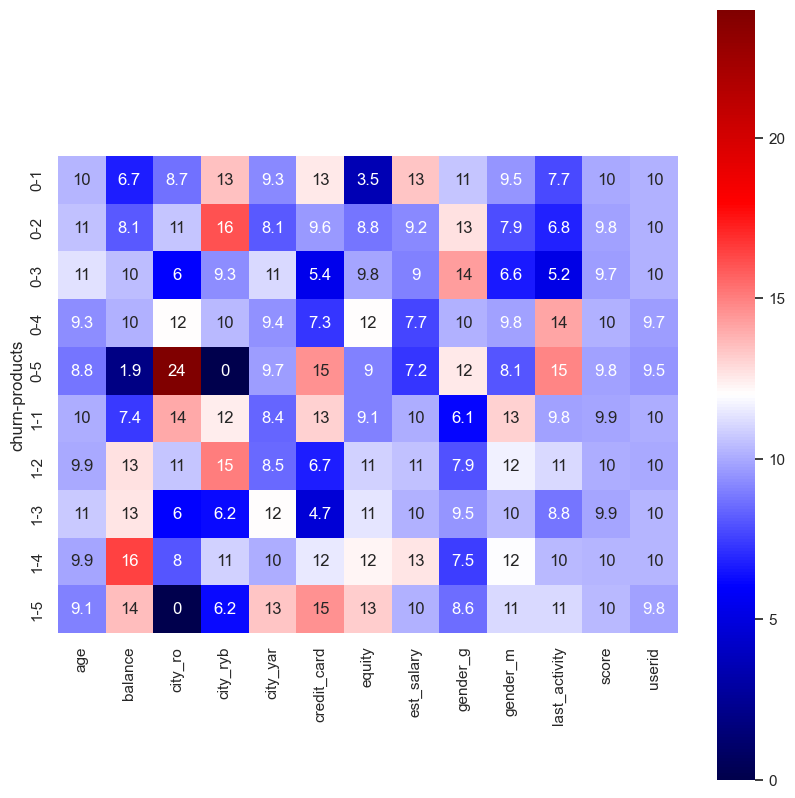

In [65]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_pivot_table_per, annot=True, square=True, cmap= 'seismic')

Баланс у клиентов в оттоке выше в количественном и процентном соотношениях. Не в оттоке самый низкий баланс у клиентов с 5 продуктами.

Самое высокое количество баллов собственности у клиентов с 5 продуктами в оттоке.

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

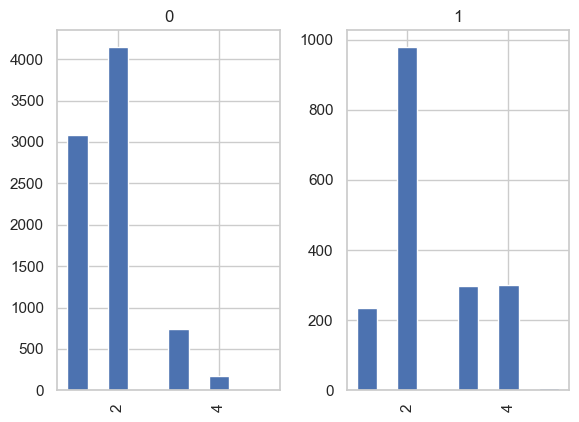

In [66]:
sns.set(style="whitegrid")
data[data['products']!=0].hist(column="products", by="churn")

В количественном исчислении в отток попадают в основном клиенты с количеством продуктов 2 и выше.

Посмотрим на отток по городам:

In [67]:
data.pivot_table(index='city', columns='churn', aggfunc='size', fill_value=0)

churn,0,1
city,,
Ростов,1151,265
Рыбинск,2246,437
Ярославль,4758,1117


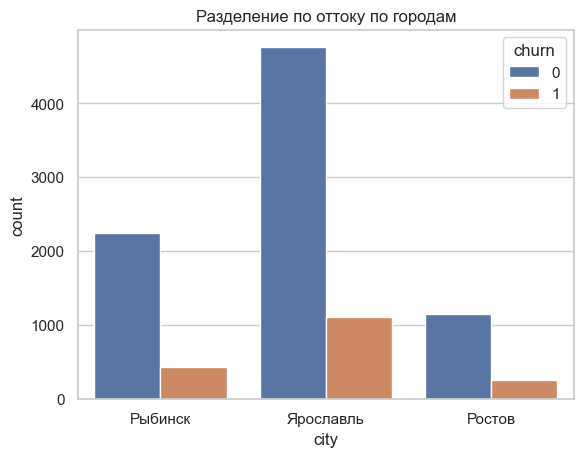

In [68]:
sns.countplot(data=data, x='city', hue='churn');
plt.title('Разделение по оттоку по городам')
plt.show()        

In [69]:
data.groupby('city').agg({'churn': 'mean'}).round(3)

,churn
city,
Ростов,0.187
Рыбинск,0.163
Ярославль,0.190


Text(0.5, 1.0, 'Отток по городам')

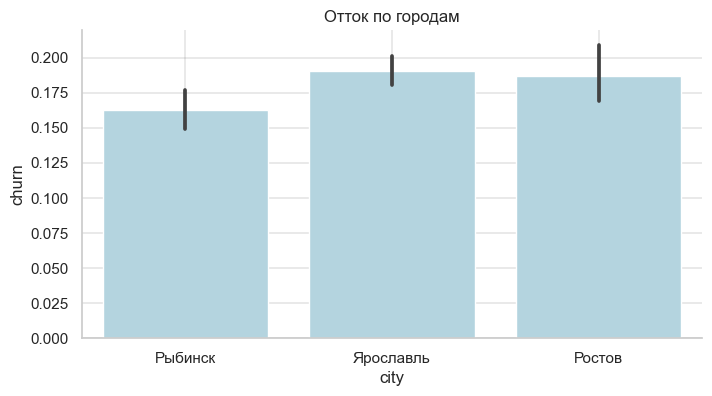

In [70]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='city', y='churn', ax=ax, color='lightblue')
ax.grid(color='grey', lw=0.25)
ax.set_title("Отток по городам")

Больше всего клиентов в количественном выражении попало в отток в Ярославле. В процентном соотношении распределение между городами незначительное, в Рыбинске меньше всего - 16,3 %.

Посмотрим на разделение оттока по половому признаку:

In [71]:
data.pivot_table(index='gender', columns='churn', aggfunc='size', fill_value=0)

churn,0,1
gender,,
Ж,4347,636
М,3808,1183


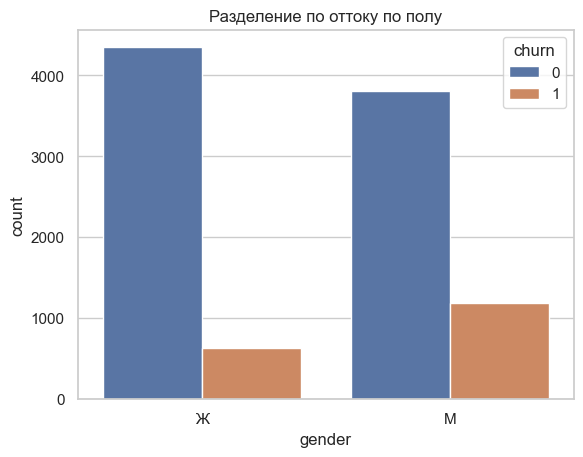

In [72]:
sns.countplot(data=data, x='gender', hue='churn');
plt.title('Разделение по оттоку по полу')
plt.show() 

In [73]:
data.groupby('gender').agg({'churn': 'mean'}).round(3)

,churn
gender,
Ж,0.128
М,0.237


Text(0.5, 1.0, 'Отток по полу')

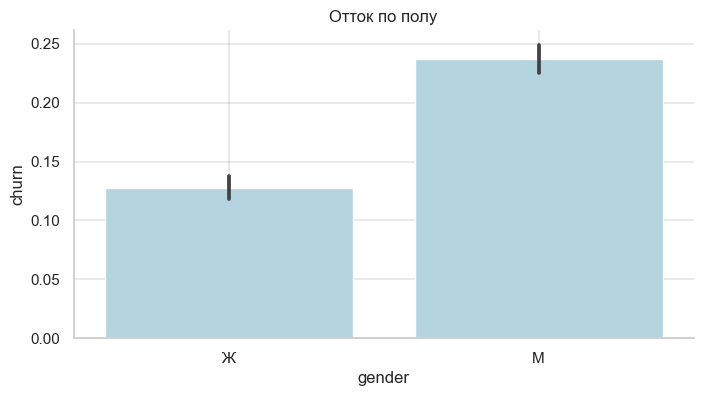

In [74]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='gender', y='churn', ax=ax, color='lightblue')
ax.grid( color='grey', lw=0.25)
ax.set_title("Отток по полу")

В количественном и в процентном соотношениях в оттоке больше мужчин.

Посмотрим на разделение по оттоку по наличию кредитной карты:

In [75]:
data.pivot_table(index='credit_card', columns='churn', aggfunc='size', fill_value=0)

churn,0,1
credit_card,,
0,2374,816
1,5781,1003


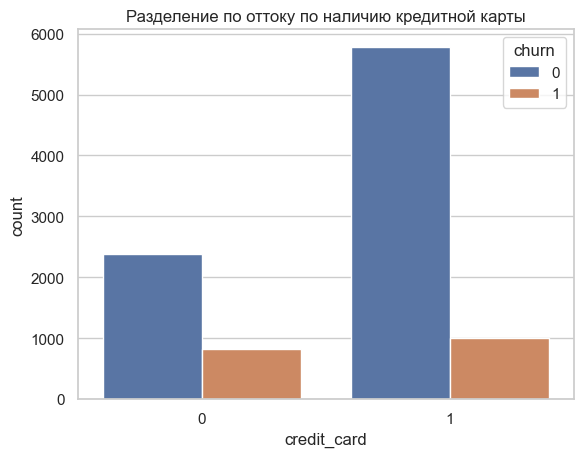

In [76]:
sns.countplot(data=data, x='credit_card', hue='churn');
plt.title('Разделение по оттоку по наличию кредитной карты')
plt.show() 

In [77]:
data.groupby('credit_card').agg({'churn': 'mean'}).round(3)

,churn
credit_card,
0,0.256
1,0.148


Text(0.5, 1.0, 'Отток по кредитной карте')

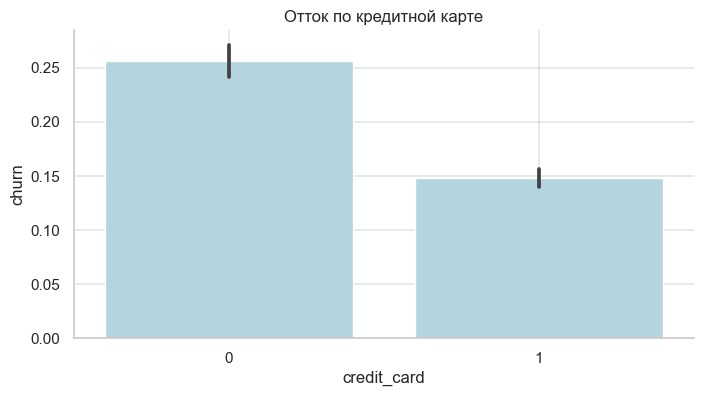

In [78]:
fig, ax = plt.subplots( figsize=(8, 4))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='credit_card', y='churn', ax=ax, color='lightblue')
ax.grid( color='grey', lw=0.25)
ax.set_title("Отток по кредитной карте")

Клиенты с кредитной картой в банке больше и они чаще остаются в банке. В отток попало 15%. 

Клиентов без кредитной карты в банке значительно меньше, но они чаще попадают в отток - 26%.

In [79]:
data_one.head(5)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_g,gender_m,city_ro,city_ryb,city_yar
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,1


Посмотрим на отток по всем параметрам в количественном и процентном выражении:

In [80]:
data_one_group = data_one.groupby('churn').agg({'userid': 'count',
                               'score': 'mean',
                               'age': 'mean',
                               'equity': 'mean',
                               'balance': 'median',
                               'products': 'mean',
                               'credit_card': 'sum',
                               'last_activity': 'sum',
                               'est_salary': 'median',
                               'gender_g': 'sum',
                               'gender_m': 'sum',
                               'city_ro': 'sum',
                               'city_ryb': 'sum',
                               'city_yar': 'sum'
                               }).round(2)
data_one_group

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,gender_g,gender_m,city_ro,city_ryb,city_yar
churn,,,,,,,,,,,,,,
0,8155,845.40,43.02,2.38,475410.09,1.76,5781,3938,118227.60,4347,3808,1151,2246,4758
1,1819,863.42,41.45,3.76,783908.90,2.38,1003,1277,125395.22,636,1183,265,437,1117


In [81]:
percentages = (data_one_group / data_one_group.sum() * 100).round(2)
percentages

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,gender_g,gender_m,city_ro,city_ryb,city_yar
churn,,,,,,,,,,,,,,
0,81.76,49.47,50.93,38.76,37.75,42.51,85.22,75.51,48.53,87.24,76.3,81.29,83.71,80.99
1,18.24,50.53,49.07,61.24,62.25,57.49,14.78,24.49,51.47,12.76,23.7,18.71,16.29,19.01


Таким образом портрет усредненного клиента в оттоке следующий:
- мужчина
- от 25 до 35 и от 50 до 61 года
- баллы кредитного скорринга - от 820 до 910
- без кредитной карты в процентном соотношении от группы
- количество баллов соббственности больше 2
- с балансом выше 0,8 млн
- с оценочным доходом от 100 тыс до 220 тыс
- количество продуктов 2 и выше

## Проверка гипотез

### Гипотеза №1
Проверим гипотезу, на различие возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

H_0: Статистической разницы в возрасте между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним нет.

H_1: Статистическая разница в возрасте между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним есть.

alpha = 0.05

Сформируем выборки:

In [82]:
sample_1 = data.loc[data['products']==1]['age']
sample_2 = data.loc[data['products']==2]['age']

In [83]:
print('Количество клиентов с 1 продуктом:', len(sample_1))
print('Количестов клиентов с 2 продуктами:', len(sample_2))

Количество клиентов с 1 продуктом: 3323
Количестов клиентов с 2 продуктами: 5119


In [84]:
sample_1.describe()

count    3323.000000
mean       42.196208
std        11.986899
min        18.000000
25%        33.000000
50%        40.000000
75%        49.500000
max        86.000000
Name: age, dtype: float64

In [85]:
sample_2.describe()

count    5119.000000
mean       42.768900
std        12.157617
min        18.000000
25%        33.000000
50%        40.000000
75%        52.000000
max        84.000000
Name: age, dtype: float64

In [86]:
data_age = data[(data['products']==1) | (data['products']==2)]['age']

Выборки независимы в силу способа их формирования.

Проверим распределение на нормальность, создадим QQ график.
Если точки на графике примерно совпадают с прямой диагональной линией, предполагается, что данные распределены нормально.

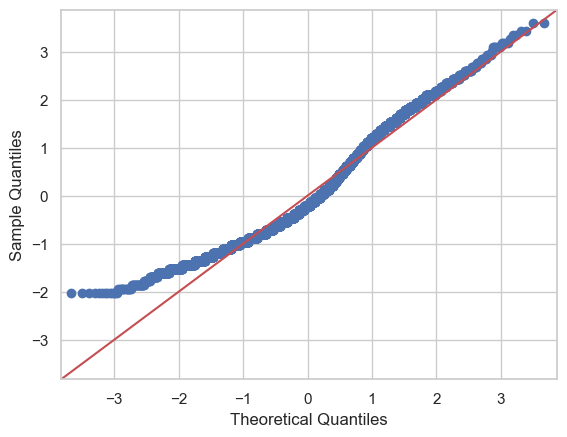

In [87]:
import math
from scipy. stats import lognorm
import statsmodels.api as sm

def normalize(data: pd.Series) -> np.array:
    return (data - np.nanmean(data)) / np.nanstd(data)

fig = sm.qqplot (normalize(data_age), line='45')

plt.show()

Точки значительно отклоняются от прямой нормального распределения, значит распределение ненормальное - будем использовать тест Манна Уитни.

(array([  60.,  158.,  571.,  725.,  990., 1279.,  808.,  913.,  464.,
         455.,  529.,  398.,  460.,  237.,  196.,  121.,   42.,   19.,
          11.,    6.]),
 array([18. , 21.4, 24.8, 28.2, 31.6, 35. , 38.4, 41.8, 45.2, 48.6, 52. ,
        55.4, 58.8, 62.2, 65.6, 69. , 72.4, 75.8, 79.2, 82.6, 86. ]),
 <BarContainer object of 20 artists>)

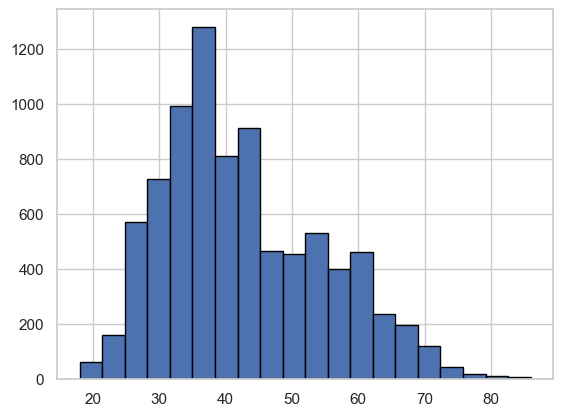

In [88]:
plt.hist (data_age, edgecolor='black', bins=20) 

In [89]:
list1 = data.loc[data['products']==1]['age']. tolist ()
list2 = data.loc[data['products']==2]['age']. tolist ()

from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(list1, list2, alternative='two-sided')
print('u_stat =', u_stat, '', 'p_value =', p_value)

u_stat = 8297191.5  p_value = 0.057138410813417605


Отвергаем нулевую гипотезу.

Вывод: Статистическая разница в возрасте между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним есть.

### Гипотеза №2
Проверим гипотезу на различие по половому признаку между клиентами по баллами кредитного скорринга.

H_0: Статистической разницы между клиентами по баллами кредитного скорринга нет.

H_1: Статистическая разница между клиентами по баллами кредитного скорринга есть.

alpha = 0.05

Сформируем выборки:

In [90]:
sample_1_gender = data.loc[data['gender']=='М']['score']
sample_2_gender = data.loc[data['gender']=='Ж']['score']

In [91]:
print('Количество женщин:', len(sample_1_gender))
print('Количестов мужчин:', len(sample_2_gender))

Количество женщин: 4991
Количестов мужчин: 4983


In [92]:
sample_1_gender.describe()

count    4991.000000
mean      849.416349
std        67.520921
min       642.000000
25%       801.000000
50%       855.000000
75%       902.000000
max      1000.000000
Name: score, dtype: float64

In [93]:
sample_2_gender.describe()

count    4983.000000
mean      847.947622
std        63.202042
min       642.000000
25%       802.000000
50%       851.000000
75%       897.000000
max      1000.000000
Name: score, dtype: float64

In [94]:
data_gender = data[(data['gender']=='М') | (data['gender']=='Ж')]['score']

Выборки независимы в силу способа их формирования.

Проверим распределение на нормальность, создадим QQ график. Если точки на графике примерно совпадают с прямой диагональной линией, предполагается, что данные распределены нормально.

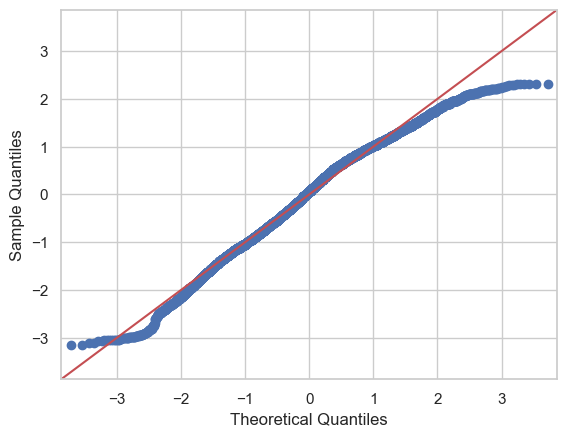

In [95]:
fig = sm. qqplot (normalize(data_gender), line='45')

plt.show()

Точки значительно отклоняются от прямой нормального распределения, значит распределение ненормальное - будем использовать тест Манна Уитни.

(array([  55.,   25.,   60.,  124.,  164.,  247.,  414.,  675.,  796.,
         837.,  901.,  882.,  875.,  981., 1085.,  885.,  485.,  256.,
         147.,   80.]),
 array([ 642. ,  659.9,  677.8,  695.7,  713.6,  731.5,  749.4,  767.3,
         785.2,  803.1,  821. ,  838.9,  856.8,  874.7,  892.6,  910.5,
         928.4,  946.3,  964.2,  982.1, 1000. ]),
 <BarContainer object of 20 artists>)

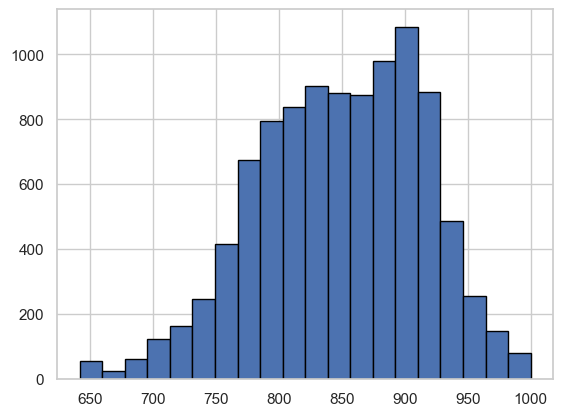

In [96]:
plt.hist (data_gender, edgecolor='black', bins=20) 

In [97]:
list1 = data.loc[data['gender']=='М']['score']. tolist ()
list2 = data.loc[data['gender']=='Ж']['score']. tolist ()

u_stat, p_value = mannwhitneyu(list1, list2, alternative='two-sided')
print('u_stat =', u_stat, '', 'p_value =', p_value)

u_stat = 12709072.5  p_value = 0.056695591917939665


Отвергаем нулевую гипотезу.

Вывод: Статистическая разница между клиентами по баллами кредитного скорринга есть.

## Сегментация
Сегментируем пользователей по количеству потребляемых продуктов

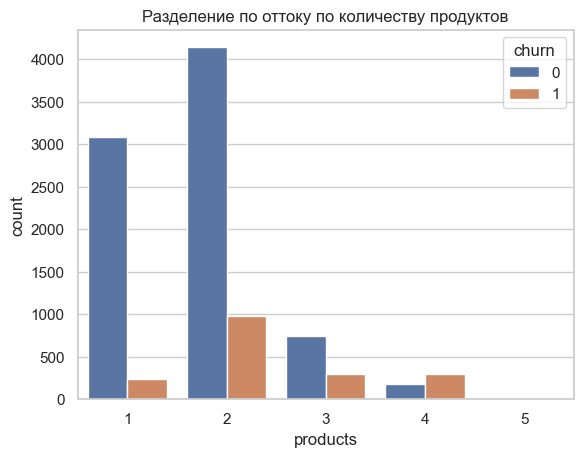

In [98]:
sns.countplot(data=data[data['products']!=0], x='products', hue='churn');
plt.title('Разделение по оттоку по количеству продуктов')
plt.show() 

In [99]:
data_products_group = data[data['products']!=0].groupby('products').agg({'userid': 'count','churn': 'sum'})
data_products_group = data_products_group.reset_index()

data_products_group['share_churn'] = (data_products_group['churn']/data_products_group['userid']).round(2)
data_products_group['not_churn'] = data_products_group['userid']-data_products_group['churn']
data_products_group['share_not_churn'] = (data_products_group['not_churn']/data_products_group['userid']).round(2)

data_products_group.rename(columns={'userid':'total'}, inplace=True)

data_products_group

,products,total,churn,share_churn,not_churn,share_not_churn
0,1,3323,235,0.07,3088,0.93
1,2,5119,978,0.19,4141,0.81
2,3,1038,297,0.29,741,0.71
3,4,474,300,0.63,174,0.37
4,5,19,8,0.42,11,0.58


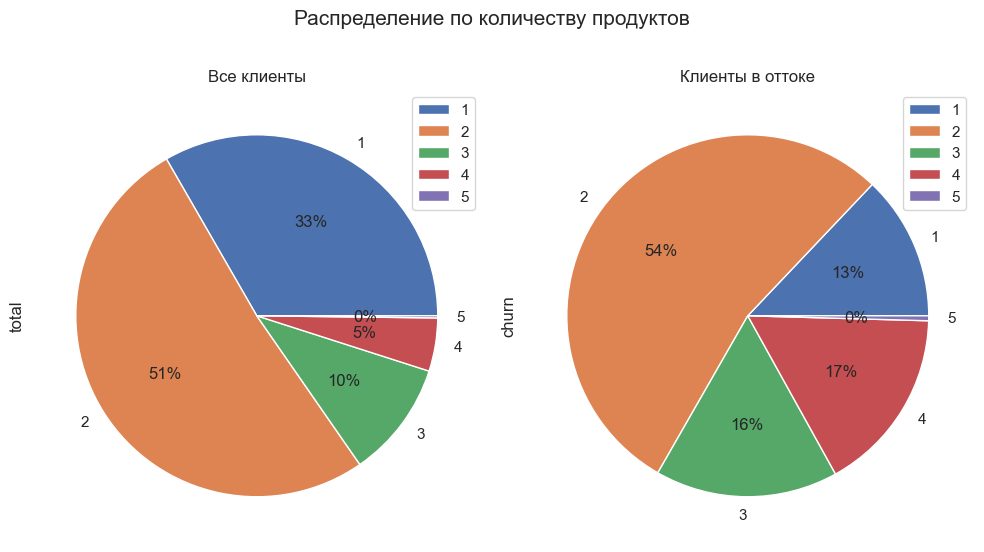

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

data_products_group.plot(kind='pie', y='total',labels=data_products_group['products'], autopct='%1.0f%%', ax=ax[0])

data_products_group.plot(kind='pie', y='churn',labels=data_products_group['products'], autopct='%1.0f%%', ax=ax[1])

fig.suptitle('Распределение по количеству продуктов', fontsize=15)
ax[0].set_title('Все клиенты')
ax[1].set_title('Клиенты в оттоке')
fig.tight_layout()

1) Большинство клиентов банка имеет 2 продукта - 51%. 54% клиентов в оттоке подключены к 2 продуктам.

2) Клиенты с 1 продуктом на втором месте по количеству процентов - 33%, но гораздо реже уходят из банка, всго 13% от оттока.
3) Клиенты с 3,4,5 продуктами в общей сложности составляют 15%, в оттоке их 33%.

Построим диаграммы размаха в разрезе количества продуктов:

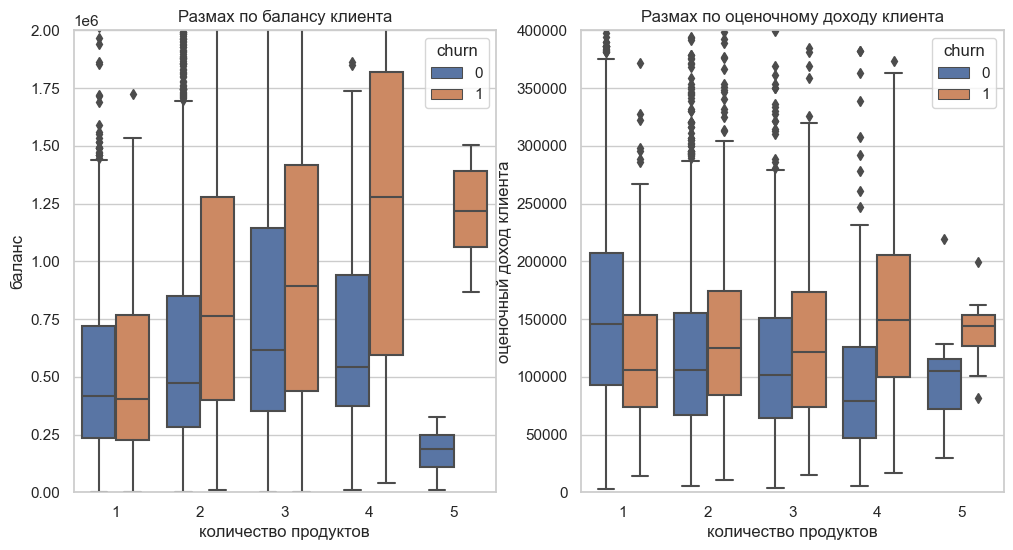

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# диаграмма по балансу клиента
sns.boxplot(data=data[data['products']!=0], y = 'balance', x = 'products', ax=axes[0], hue="churn")
axes[0].set_title('Размах по балансу клиента')
axes[0].set_ylabel('баланс')
axes[0].set_xlabel('количество продуктов')
axes[0].set_ylim(0, 2000000)

# диаграмма по оценочному доходу клиента
sns.boxplot(data=data[data['products']!=0], y = 'est_salary', x = 'products', ax=axes[1], hue="churn")
axes[1].set_title('Размах по оценочному доходу клиента')
axes[1].set_ylabel('оценочный доход клиента')
axes[1].set_xlabel('количество продуктов')
axes[1].set_ylim(0, 400000)


plt.show()

По балансу на счете клиенты с 1 продуктом похожи, среднее значение примерно на одном уровне.
Клиенты начиная с 2 продуктов и выше имеют гораздо больший баланс.

По оценочному доходу клиенты с 1 продуктом имеют отличие в пользу остающихся. 
Клиенты с 2 и более продуктов имеют доход выше остающихся.

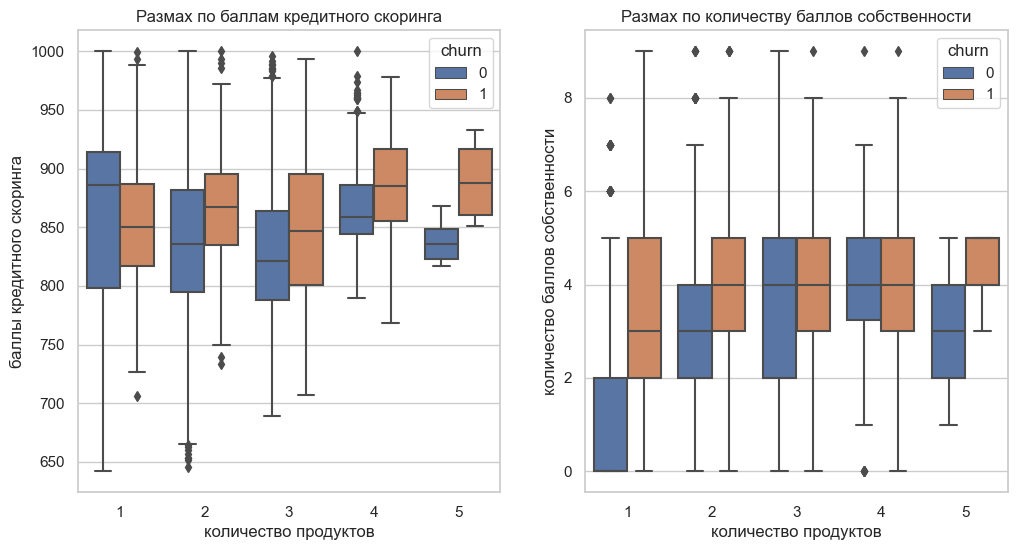

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# диаграмма по баллам кредитного скоринга
sns.boxplot(data=data[data['products']!=0], y = 'score', x = 'products', ax=axes[0], hue="churn")
axes[0].set_title('Размах по баллам кредитного скоринга')
axes[0].set_ylabel('баллы кредитного скоринга')
axes[0].set_xlabel('количество продуктов')

# диаграмма по количеству баллов собственности
sns.boxplot(data=data[data['products']!=0], y = 'equity', x = 'products', ax=axes[1], hue="churn")
axes[1].set_title('Размах по количеству баллов собственности')
axes[1].set_ylabel('количество баллов собственности')
axes[1].set_xlabel('количество продуктов')

plt.show()

По баллам кредитного скорринга клиенты, остающиеся с банком и имеющие один продукт, находятся выше клиентов оттока.
Среди клиентов с 2 продуктами и выше в отток попадают клиентами с более высокими баллами.

По количеству баллов собственности клиенты в оттоке с 1, 2 и 5 продуктами находятся выше остающихся.
Клиенты с 3 и 4 продуктами находятся на одном уровне по средним баллам независимо от оттока.

In [103]:
# описательная статистика столбца equity с количеством продуктов равным 1
data[(data['products']==1) & (data['churn']==0)]['equity'].describe().T

count    3088.000000
mean        1.193977
std         1.792871
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         8.000000
Name: equity, dtype: float64

Посмотрим на различия по возрасту в группах клиентов по количеству продуктов:

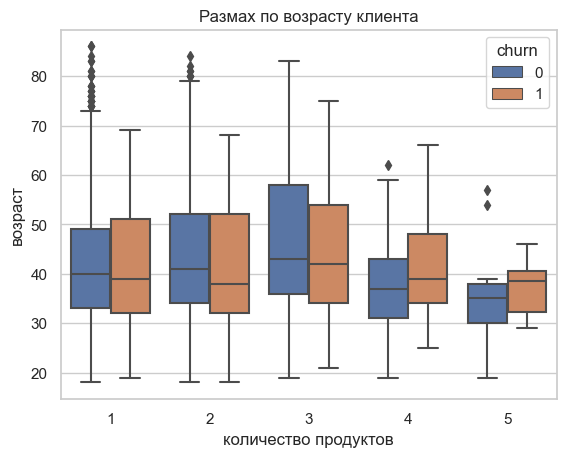

In [104]:
# диаграмма по возрасту
sns.boxplot(data=data[data['products']!=0], y = 'age', x = 'products', hue="churn")
plt.title('Размах по возрасту клиента')
plt.ylabel('возраст')
plt.xlabel('количество продуктов')

plt.show()

Клиенты с 1, 2 и 3 продуктами, остающиеся с банком, в среднем немного старше клиентов оттока. Самые взрослые клиенты - старше 75 лет, не попадают в отток.

Клиенты, остающиеся с банком, с 4 и 5 продуктами в среднем немного моложе оттока.

Text(0.5, 22.249999999999993, 'количество продуктов')

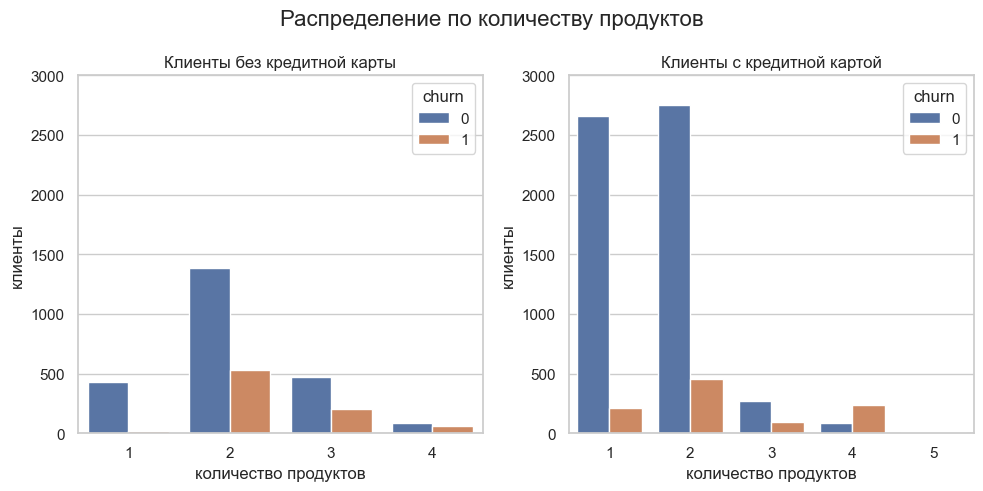

In [105]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data=data[(data['products']!=0) &(data['credit_card']==0)], x='products', hue="churn", ax=ax[0])

sns.countplot(data=data[(data['products']!=0) &(data['credit_card']==1)], x='products', hue="churn", ax=ax[1])
fig.suptitle('Распределение по количеству продуктов', fontsize=16)
ax[0].set_title('Клиенты без кредитной карты')
ax[1].set_title('Клиенты с кредитной картой')
plt.setp(ax, ylim=(0, 3000))
fig.tight_layout()
ax[0].set_ylabel('клиенты')
ax[0].set_xlabel('количество продуктов')
ax[1].set_ylabel('клиенты')
ax[1].set_xlabel('количество продуктов')

In [106]:
pie_data = data[data['products']!=0].groupby('credit_card')[['credit_card']].count()
# переименуем столбец
pie_data.columns = ['total_count']

pie_data = pie_data.reset_index().sort_values(by='total_count', ascending=False)
pie_data

,credit_card,total_count
1,1,6784
0,0,3189


Text(0.5, 1.0, 'Деление по наличию кредитной карты')

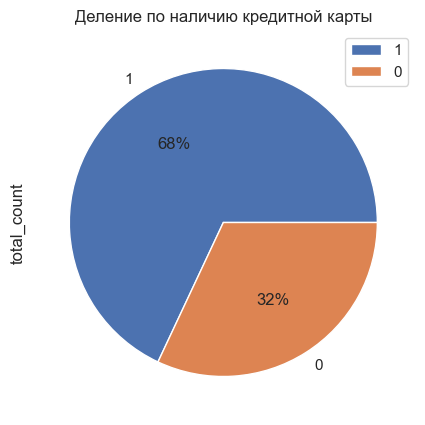

In [107]:
pie_data.plot(kind='pie', y='total_count', autopct='%1.0f%%', figsize=(5, 5))
plt.title('Деление по наличию кредитной карты')

In [108]:
data_credit = pd.pivot_table(data[data['products']!=0], values='credit_card', index=['churn', 'products'],
                        aggfunc="sum")
data_credit['total_share'] = ((data_credit['credit_card']/data_credit['credit_card'].sum())*100).round(2)
data_credit

credit_card  total_share
churn products                          
0     1                2658        39.18
      2                2752        40.57
      3                 273         4.02
      4                  87         1.28
      5                  11         0.16
1     1                 212         3.12
      2                 451         6.65
      3                  96         1.42
      4                 236         3.48
      5                   8         0.12

Клиентов с кредитной картой в банке - 68%. Большинство клиентов с кредитной картой остаются в банке.

Text(0.5, 22.249999999999993, 'количество продуктов')

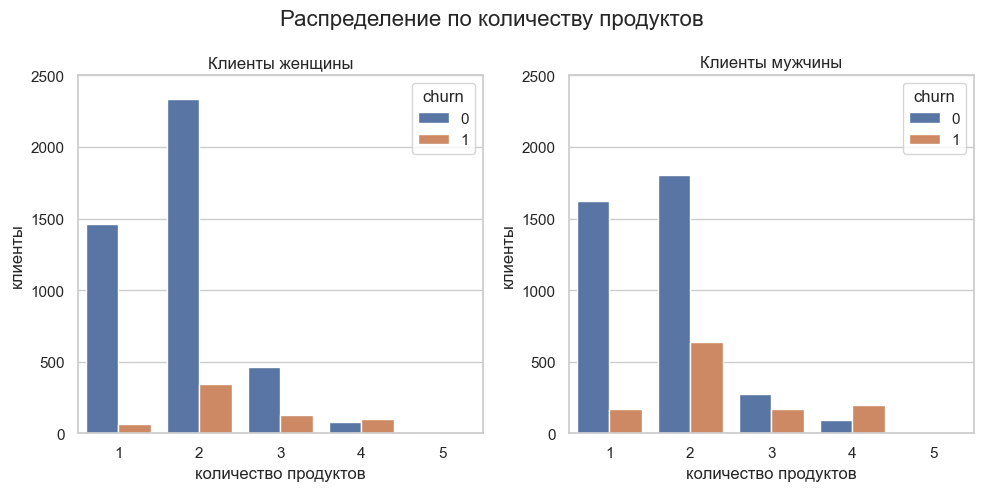

In [109]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data=data[(data['products']!=0) &(data['gender_g']==1)], x='products', hue="churn", ax=ax[0])

sns.countplot(data=data[(data['products']!=0) &(data['gender_m']==1)], x='products', hue="churn", ax=ax[1])

fig.suptitle('Распределение по количеству продуктов', fontsize=16)
ax[0].set_title('Клиенты женщины')
ax[1].set_title('Клиенты мужчины')
plt.setp(ax, ylim=(0, 2500))
fig.tight_layout()
ax[0].set_ylabel('клиенты')
ax[0].set_xlabel('количество продуктов')
ax[1].set_ylabel('клиенты')
ax[1].set_xlabel('количество продуктов')


In [110]:
pie_data = data[data['products']!=0].groupby('gender')[['gender']].count()
# переименуем столбец
pie_data.columns = ['total_count']

pie_data = pie_data.reset_index().sort_values(by='total_count', ascending=False)
pie_data

,gender,total_count
1,М,4991
0,Ж,4982


Клиенты мужчины и женщины в банке в практически равном количестве. Жещины чаще остатся с банком. Мужчины, подключенные к 2 и более продуктам уходят чаще женщин. Женщины и мужчины, использующие 4 продукта, чаще уходят чем остаются с банком.

Text(0.5, 22.249999999999993, 'количество продуктов')

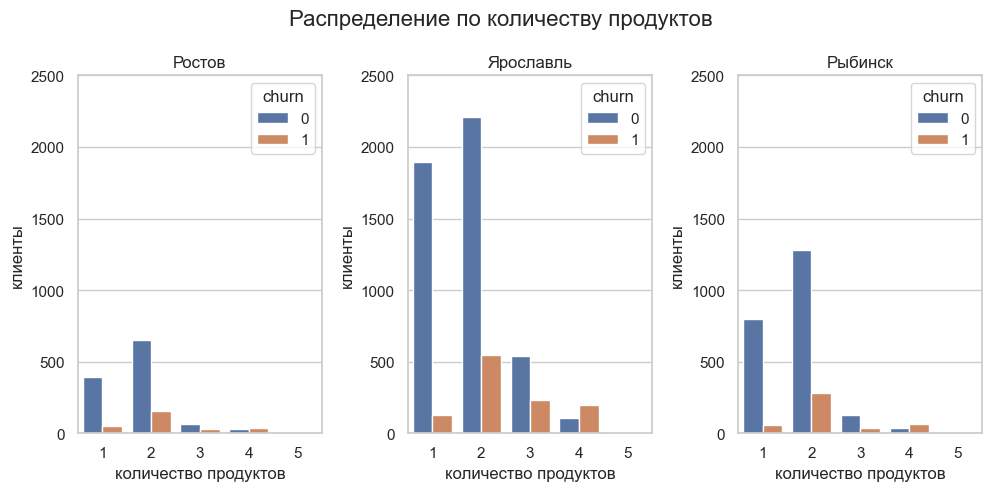

In [111]:
fig, ax =plt.subplots(1,3, figsize=(10, 5))
sns.countplot(data=data[(data['products']!=0) &(data['city_ro']==1)], x='products', hue="churn", ax=ax[0])

sns.countplot(data=data[(data['products']!=0) &(data['city_yar']==1)], x='products', hue="churn", ax=ax[1])

sns.countplot(data=data[(data['products']!=0) &(data['city_ryb']==1)], x='products', hue="churn", ax=ax[2])

fig.suptitle('Распределение по количеству продуктов', fontsize=16)
ax[0].set_title('Ростов')
ax[1].set_title('Ярославль')
ax[2].set_title('Рыбинск')
fig.tight_layout()
plt.setp(ax, ylim=(0, 2500))

ax[0].set_ylabel('клиенты')
ax[0].set_xlabel('количество продуктов')
ax[1].set_ylabel('клиенты')
ax[1].set_xlabel('количество продуктов')
ax[2].set_ylabel('клиенты')
ax[2].set_xlabel('количество продуктов')

In [112]:
data_city = pd.pivot_table(data[data['products']!=0], values=['city_ro', 'city_yar', 'city_ryb'],\
                           index=['churn', 'products'],
                        aggfunc="sum")
data_city

city_ro  city_ryb  city_yar
churn products                             
0     1             395       801      1892
      2             653      1280      2208
      3              68       130       543
      4              31        35       108
      5               4         0         7
1     1              49        56       130
      2             152       280       546
      3              27        35       235
      4              37        64       199
      5               0         1         7

<Axes: ylabel='churn-products'>

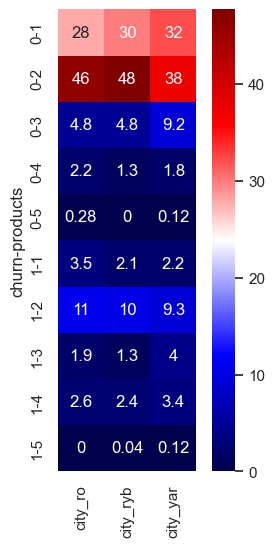

In [113]:
plt.figure(figsize=(4, 6))
sns.heatmap(data_city.apply(lambda x: (x*100/sum(x)).round(2)), annot=True, square=True, cmap= 'seismic')

При делении по городам видно, что в отток значительно чаще попадают клиенты с 2 продуктами. Этих же клиентов в банке большинство. Большинство клиентов с 4 продуктами уходит из банка независимо от города.

### Вывод по результататам сегментации пользователей по количеству потребляемых продуктов

Выделим несколько сегментов для проведения мероприятий по удержанию их от оттока в перспективе.

Сегмент 1: Клиенты с 3 или 4 продуктами - клиенты склонны к попаданию в отток независимо от пола и города проживания. Сегмент небольшой, поэтому представляется возможным провести работу со всем сегментом.

Сегмент 2: Клиенты мужчины с 2 продуктами без кредитной карты - по совокупности параметров чаще других попадают в отток. 

Сегмент 3: Клиент с 1 продуктом и с оценочным доходом от 100 до 150 тыс, так как эти клиенты более склонны к оттоку в своей категории.

Посчитаем количество клиентов в выделенных сегментах:

In [114]:
seg_1 = data.loc[(data['products']==3) & (data['churn']==0) | (data['products']==4) & (data['churn']==0)]['age']

seg_2 = data.loc[(data['products']==2) & (data['credit_card']==0) & (data['gender_m']==1) \
                 & (data['churn']==0)]['age']

seg_3 = data.loc[(data['products']==1) & (data['est_salary']>100000) &(data['est_salary']<150000) \
                 & (data['churn']==0)]['age']

print('Количестов клиентов в сегменте 1:', len(seg_1), ' ', '- доля в оттоке:', \
     ((data.loc[(data['products']==3) & (data['churn']==1) | (data['products']==4) \
             & (data['churn']==1)]['age'].count()/data.loc[(data['churn']==1)]['age'].count())*100).round(1), '%',',', \
     'доля оттока в выделенном сегменте:',(data.loc[(data['products']==3) & (data['churn']==1) | (data['products']==4) \
             & (data['churn']==1)]['age'].count()/(data.loc[(data['products']==3) | \
                                                            (data['products']==4)]['age'].count())*100).round(1), '%')

print('Количестов клиентов в сегменте 2:', len(seg_2), ' ', '- доля в оттоке:',  \
     ((data.loc[(data['products']==2) & (data['credit_card']==0) & (data['gender_m']==1) \
             & (data['churn']==1)]['age'].count()/data.loc[(data['churn']==1)]['age'].count())*100).round(1), '%', ',',\
      'доля оттока в выделенном сегменте:', ((data.loc[(data['products']==2) & (data['credit_card']==0) & (data['gender_m']==1) \
             & (data['churn']==1)]['age'].count()/data.loc[(data['products']==2) & (data['credit_card']==0) \
                                                           & (data['gender_m']==1)]['age'].count())*100).round(1), '%')

print('Количестов клиентов в сегменте 3:', len(seg_3), ' ', '- доля в оттоке:',  \
     ((data.loc[(data['products']==1) & (data['est_salary']>100000)  &(data['est_salary']<150000) \
             & (data['churn']==1)]['age'].count()/data.loc[(data['churn']==1)]['age'].count())*100).round(1), '%'',',\
      'доля оттока в выделенном сегменте:', ((data.loc[(data['products']==1) & (data['est_salary']>100000)  &(data['est_salary']<150000) \
             & (data['churn']==1)]['age'].count()/data.loc[(data['products']==1) & (data['est_salary']>100000)  \
                                                           &(data['est_salary']<150000)]['age'].count())*100).round(1), '%')

Количестов клиентов в сегменте 1: 915   - доля в оттоке: 32.8 % , доля оттока в выделенном сегменте: 39.5 %
Количестов клиентов в сегменте 2: 453   - доля в оттоке: 16.1 % , доля оттока в выделенном сегменте: 39.3 %
Количестов клиентов в сегменте 3: 726   - доля в оттоке: 3.9 %, доля оттока в выделенном сегменте: 8.9 %


## Общий вывод и рекомендации:

На основании проведенного анализа можно сделать следующие выводы:
- 84% клиентов имеют не более двух продуктов
- клиенты с 3 и 4 продуктами попадают в отток с вероятностью 63% и 42% соответственно.
- клиенты мужчины гораздо в большем количестве попадают в отток, большинство из них в возрасте от 25 до 35 и от 50 до 61 года.
- клиентов с кредитной картой в банке - 68%. Большинство из них остаются в банке.
- клиенты с 2 и более продуктами имеют баланс выше, среди них клиенты с более высоким балансом чаще уходят из банка.
- в г.Ярославль больше всего клиентов, клиенты с 2 и более продуктами в процентном соотношении чаще уходят из банка независимо от города.

    
### Сегменты клиентов, выделенные в ходе исследования, для проведения работы по предотвращению оттока:

Сегмент 1: Клиенты с 3 или 4 продуктами - клиенты склонны к попаданию в отток независимо от пола и города проживания. Сегмент небольшой, поэтому представляется возможным провести работу со всем сегментом.

Количестов клиентов в сегменте 1: 915   - доля в оттоке: 32.8 %

Сегмент 2: Клиенты мужчины с 2 продуктами без кредитной карты - по совокупности параметров чаще других попадают в отток.

Количестов клиентов в сегменте 2: 453   - доля в оттоке: 16.1 %

Сегмент 3: Клиент с 1 продуктом и с оценочным доходом от 100 до 150 тыс, так как эти клиенты более склонны к оттоку в своей категории.

Количестов клиентов в сегменте 3: 726   - доля в оттоке: 3.9 %


### Проверка гипотез дала следующие результаты:
- Статистическая разница в возрасте между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним есть.
- Статистическая разница между клиентами по баллами кредитного скорринга есть.


### Рекомендации:
- Сегмент 1: предлагается провести отдельно анализ по самим продуктам и опрос клиентов, чтобы детально понять, что именно их не устраивает, возможно какой-то определенный продукт требует полного пересмотра стратегии.

- Сегмент 2: предложить оформление кредитной карты.

- Сегмент 3: предлагать дополнительные продукты, например, вклады для сохранения и накопления денежных средств.